In [ ]:
%%shell
jupyter nbconvert --to html /content/practicum.ipynb

[NbConvertApp] Converting notebook /content/practicum_Malakhov_Alexander.ipynb to html
[NbConvertApp] Writing 3025099 bytes to /content/practicum_Malakhov_Alexander.html


# Практикум по анализу данных
## Студента 316 группы Малахова Александра Андреевича

Был выбран датасет о ценах на квартиры в Польше. Датасет содержит информацию о предложениях в 15 крупнейших городах, за сентябрь 2023 года.
В данных представлены 16997 предложений, каждое из которых рассматривается по 27 характеристикам.
Ссылка на датасет:
https://www.kaggle.com/datasets/krzysztofjamroz/apartment-prices-in-poland/?select=apartments_pl_2023_09.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels
from scipy import stats
from scipy.stats import norm
import warnings
!pip install outlier-utils
import outliers
warnings.filterwarnings("ignore")
%load_ext rpy2.ipython

In [ ]:
%%R
library(glue)

In [ ]:
df_p = pd.read_csv('apartments_pl_2023_09.csv', index_col = 0)

In [ ]:
#Переформатирование индексов
df_p.set_index(pd.Index(range(0, df_p.shape[0])), inplace=True)

In [ ]:
%%R
df_r <- read.csv(file = 'apartments_pl_2023_09.csv', header = TRUE)

# 1. Аппроксимация распределений данных с помощью ядерных оценок.

###Построены ядерные оценки плотности для следующих характеристик:
+ Площадь (в квадратных метрах)
+ Расстояние до центра города
+ Расстояние до школы
+ Расстояние до больницы
+ Год постройки здания
+ Цена

<Axes: xlabel='price', ylabel='Count'>

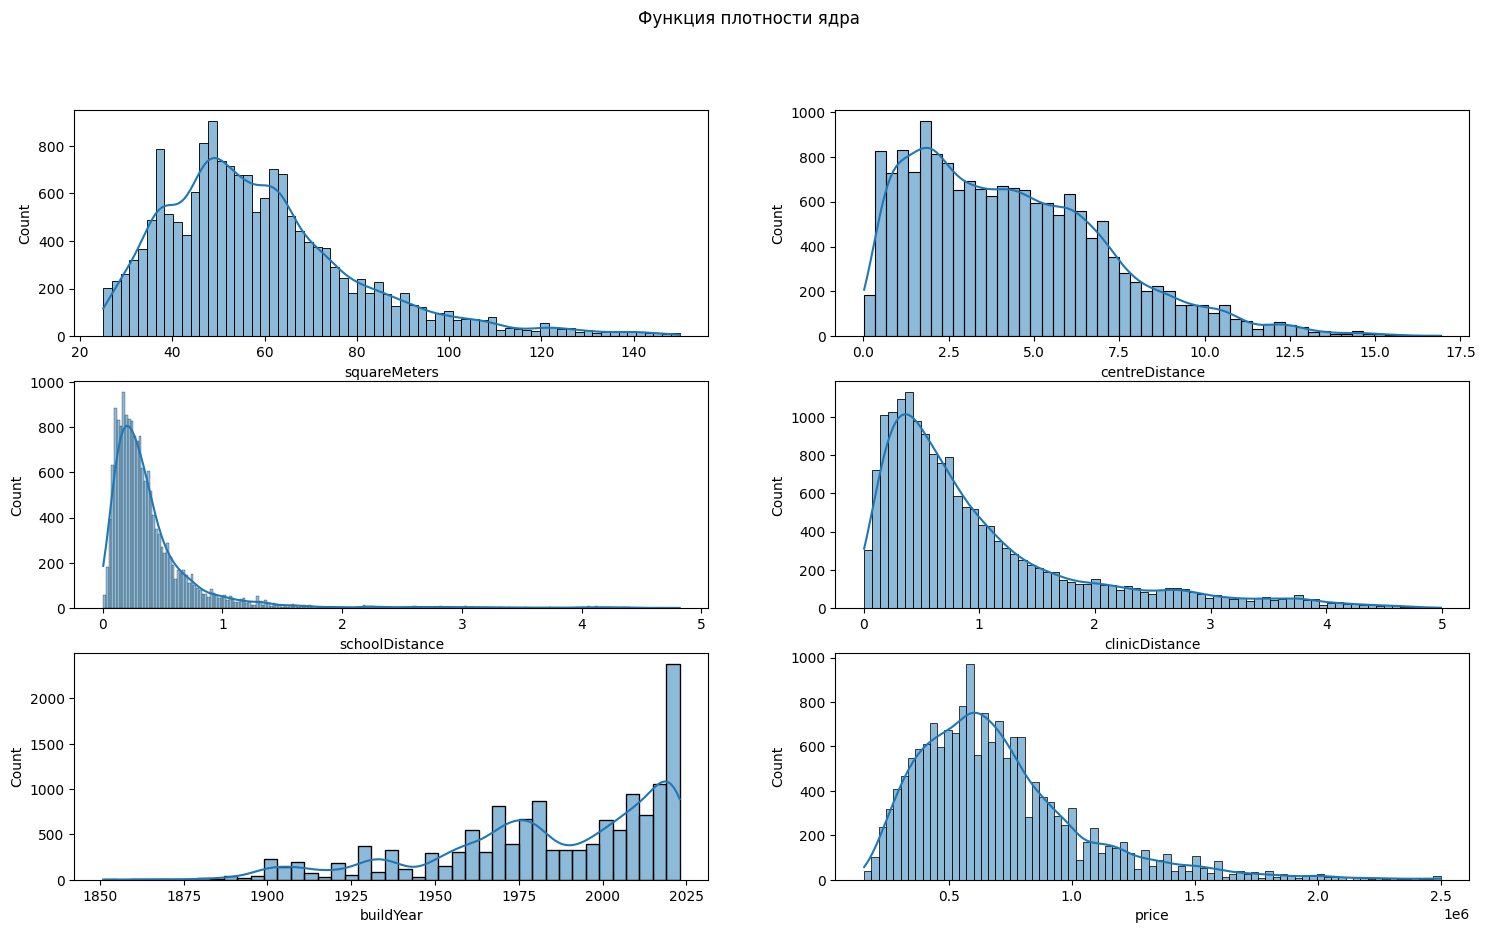

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(18, 10))

fig.suptitle('Функция плотности ядра')

sns.histplot(ax=axes[0, 0], data = df_p, x='squareMeters', kde=True, common_norm=False)
sns.histplot(ax=axes[0, 1], data = df_p, x='centreDistance', kde=True, common_norm=False)
sns.histplot(ax=axes[1, 0], data = df_p, x='schoolDistance', kde=True, common_norm=False)
sns.histplot(ax=axes[1, 1], data = df_p, x='clinicDistance', kde=True, common_norm=False)
sns.histplot(ax=axes[2, 0], data = df_p, x='buildYear', kde=True, common_norm=False)
sns.histplot(ax=axes[2, 1], data = df_p, x='price', kde=True, common_norm=False)

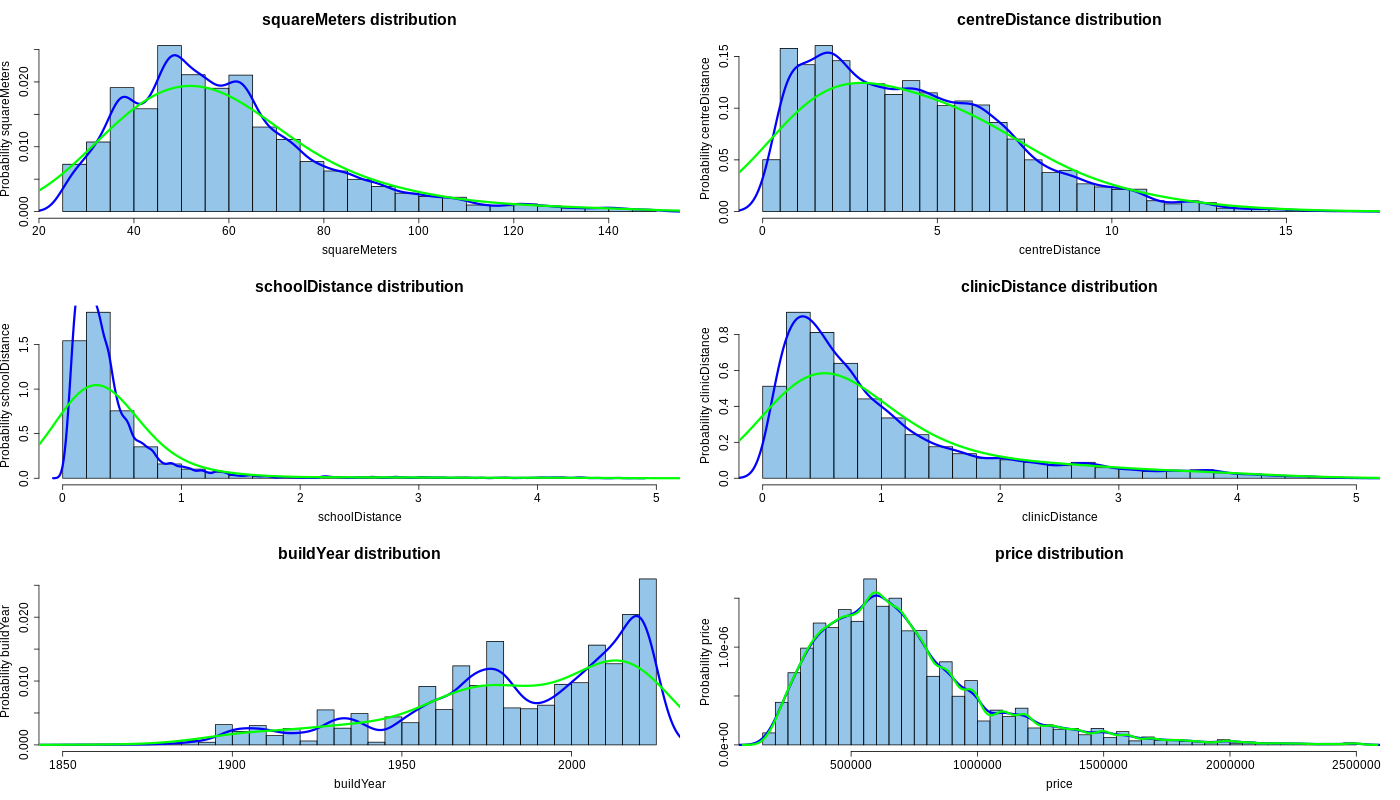

In [ ]:
%%R -w 1400 -h 800
layout(matrix(1:6, nrow = 3, byrow = TRUE))
#squareMeters distribution
hist(df_r$squareMeters, breaks = 40, freq = FALSE, col = rgb(45, 141, 214, 128, maxColorValue = 255),
     xlab = "squareMeters",
     ylab = "Probability squareMeters",
     main = "squareMeters distribution",
     cex.lab=1.5, cex.axis=1.5, cex.main=2)
lines(density(df_r$squareMeters), col = "blue", lwd = 3)
lines(density(df_r$squareMeters, bw=10), col = "green", lwd = 3)

#centerDistance distribution
hist(df_r$centreDistance, breaks = 40, freq = FALSE, col = rgb(45, 141, 214, 128, maxColorValue = 255),
     xlab = "centreDistance",
     ylab = "Probability centreDistance",
     main = "centreDistance distribution",
     cex.lab=1.5, cex.axis=1.5, cex.main=2)
lines(density(df_r$centreDistance), col = "blue", lwd = 3)
lines(density(df_r$centreDistance, bw=1.5), col = "green", lwd = 3)

#schoolDistance distibution
school_dis <- na.omit(df_r$schoolDistance)
hist(school_dis, breaks = 24, freq = FALSE, col = rgb(45, 141, 214, 128, maxColorValue = 255),
     xlab = "schoolDistance",
     ylab = "Probability schoolDistance",
     main = "schoolDistance distribution",
     cex.lab=1.5, cex.axis=1.5, cex.main=2)
lines(density(school_dis), col = "blue", lwd = 3)
lines(density(school_dis, bw=0.3), col = "green", lwd = 3)

#clinicDistance distibution
clinic_dis <- na.omit(df_r$clinicDistance)
hist(clinic_dis, breaks = 24, freq = FALSE, col = rgb(45, 141, 214, 128, maxColorValue = 255),
     xlab = "clinicDistance",
     ylab = "Probability clinicDistance",
     main = "clinicDistance distribution",
     cex.lab=1.5, cex.axis=1.5, cex.main=2)
lines(density(clinic_dis), col = "blue", lwd = 3)
lines(density(clinic_dis, bw=0.4), col = "green", lwd = 3)

#buildYear distibution
buildYear <- na.omit(df_r$buildYear)
hist(buildYear, breaks = 40, freq = FALSE, col = rgb(45, 141, 214, 128, maxColorValue = 255),
     xlab = "buildYear",
     ylab = "Probability buildYear",
     main = "buildYear distribution",
     cex.lab=1.5, cex.axis=1.5, cex.main=2)
lines(density(buildYear), col = "blue", lwd = 3)
lines(density(buildYear, bw=12), col = "green", lwd = 3)

#price distribution
hist(df_r$price, breaks = 40, freq = FALSE, col = rgb(45, 141, 214, 128, maxColorValue = 255),
     xlab = "price",
     ylab = "Probability price",
     main = "price distribution",
     cex.lab=1.5, cex.axis=1.5, cex.main=2)
lines(density(df_r$price), col = "blue", lwd = 3)
lines(density(df_r$price, bw="SJ"), col = "green", lwd = 3)

Результаты полученные в Python и R совпадают. Графики построенные в Python являются более гладкими

# 2. Анализ данных с помощью cdplot, dotchart, boxplot и stripchart.

Рассмотрим зависимость удалённости от центра города от года постройки здания в Варшаве


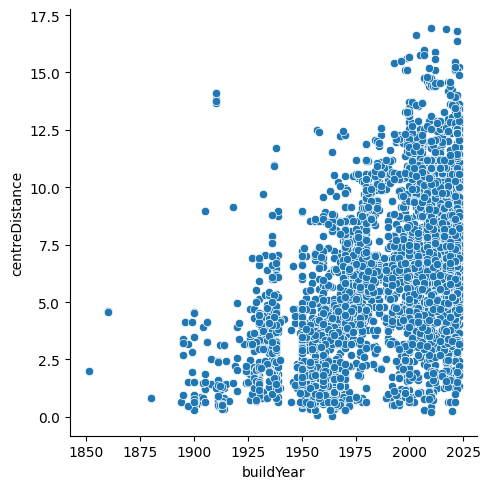

In [ ]:
sns.relplot(x='buildYear', y='centreDistance', data=df_p[df_p.city == "warszawa"], kind = "scatter")

In [ ]:
med_cdist_per_year = df_p[['buildYear','centreDistance']].groupby('buildYear', as_index=False).median()

In [16]:
y = [0.03, 0.03, 0.03, 0.04, 0.04, 0.05, 0.05, 0.06]
x = [441.800, 576.200, 635.000, 653.400, 665.000, 676.000, 692.400, 703.500]

In [25]:
dta = [(x[i], y[i]) for i in range(8)]

In [26]:
datafr = pd.DataFrame(dta, columns=["X", "Y"])

<Axes: xlabel='X', ylabel='Y'>

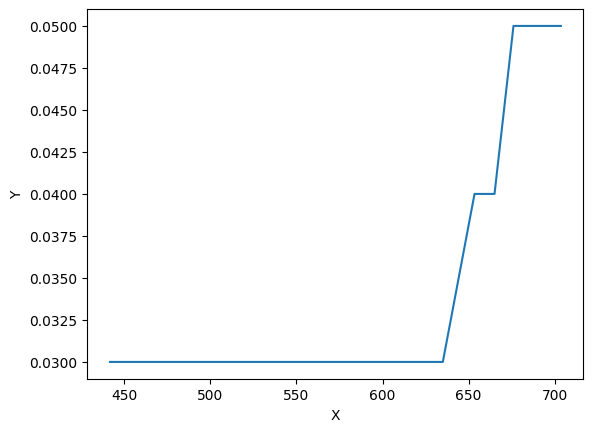

In [32]:
sns.lineplot(data=datafr, x="X", y="Y")

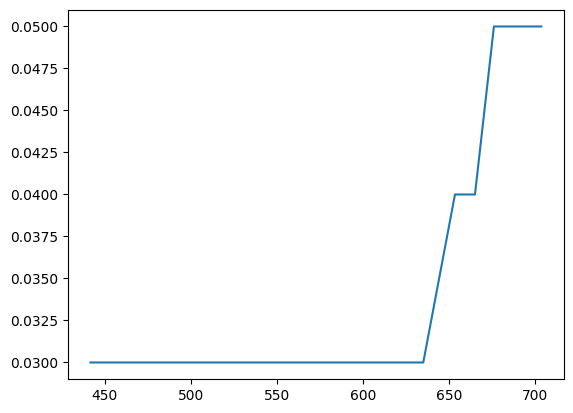

In [14]:
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

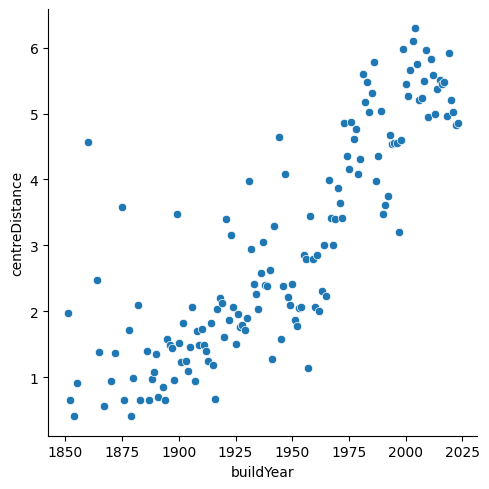

In [ ]:
sns.relplot(x='buildYear', y='centreDistance', data=med_cdist_per_year, kind = "scatter")

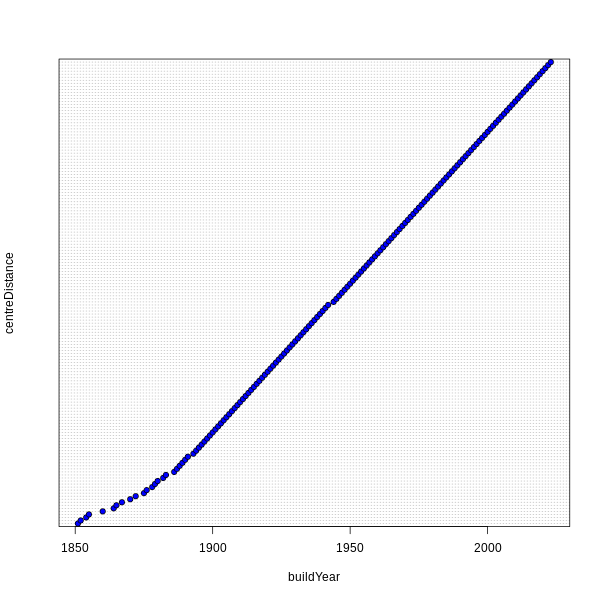

In [ ]:
%%R -i med_cdist_per_year -w 600 -h 600
#зависимость среднего расстояния у предложений с домами заданного года постройки от года постройки
dotchart(med_cdist_per_year$buildYear, bg = "blue", xlab = "buildYear", ylab = "centreDistance")

Можно сделать вывод, что старые дома расположены в основном в центре города.  
Рассмотрим в тех же координатах, как влияет тип дома, но уже для всех городов выборки

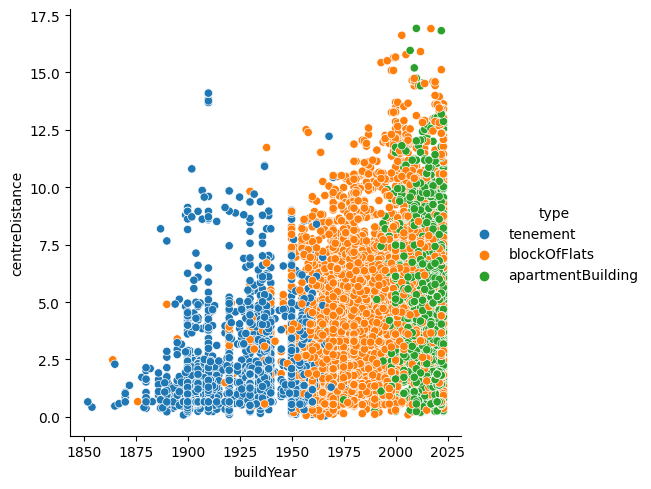

In [ ]:
sns.relplot(x='buildYear', y='centreDistance', data=df_p, hue = 'type')

Мы видим, что большинство исторических домов имеют тип tenement, в то время как apartment building относятся к последним годам.  
Построим boxplot, чтобы подтвердить предположение.

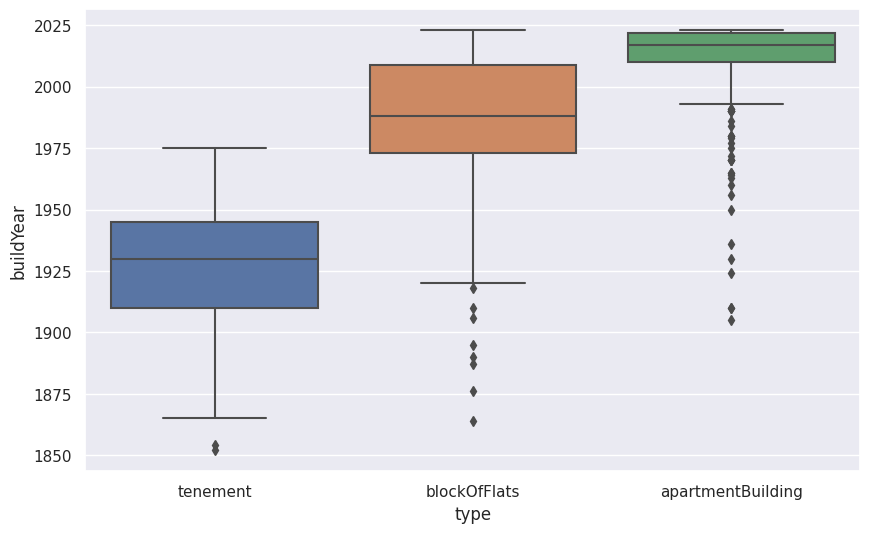

In [ ]:
sns.set (rc={"figure.figsize":( 10 , 6 )})
sns.boxplot(x='type', y='buildYear', data=df_p);

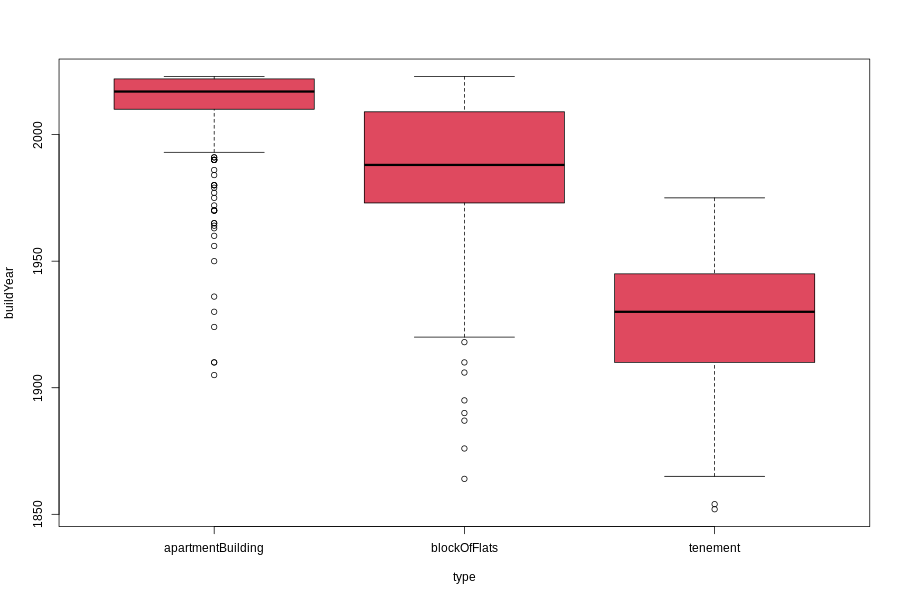

In [ ]:
%%R -w 900 -h 600
data = subset(df_r, sapply(type, nchar) > 0, select = c('type', "buildYear"))
boxplot(buildYear ~ type, col = rgb(214, 24, 52, 200, maxColorValue = 255),  data = data)

Полученные boxplot-ы подтверждают предположение.  
Рассмотрим как меняется цена, в зависимости от количества значимых мест в округе.

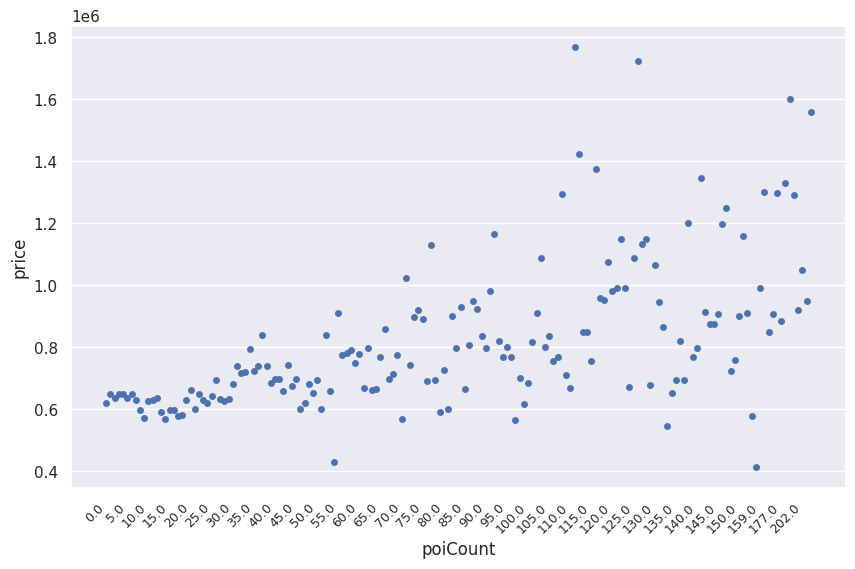

In [ ]:
med_price_per_poi = df_p[['poiCount','price']].groupby('poiCount', as_index=False).median()
sns.stripplot(x='poiCount', y='price', data=med_price_per_poi)
plt.xticks(med_price_per_poi.index, rotation=45, ha = 'right')
plt.tick_params(axis='x', which='major', labelsize=9)
plt.locator_params(axis='x',tight=True, nbins= 40)

plt.show()

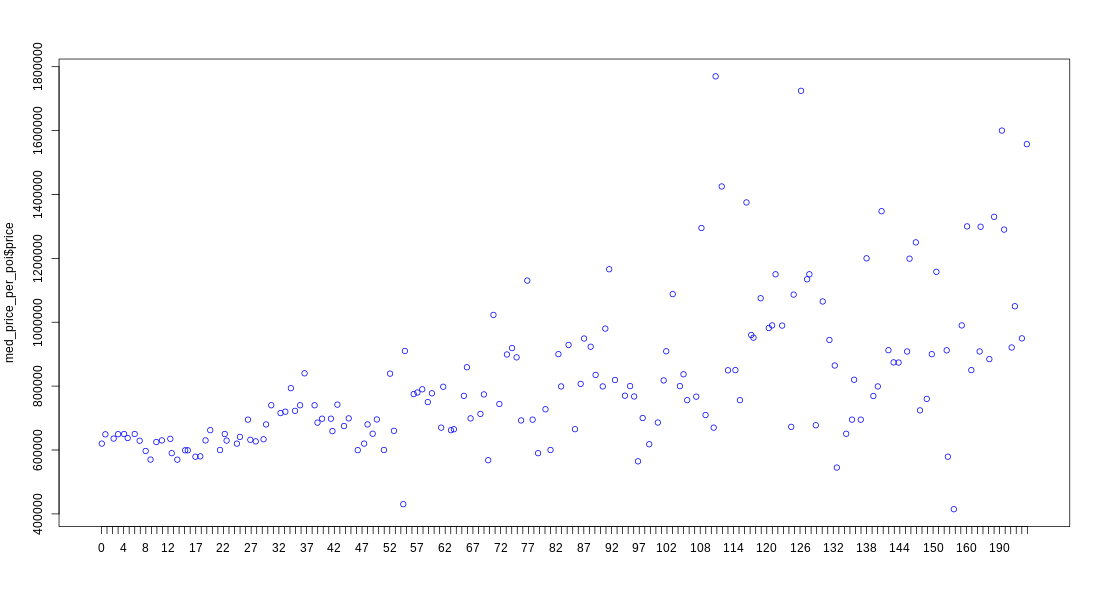

In [ ]:
%%R -i med_price_per_poi -w 1100 -h 600
stripchart(med_price_per_poi$price ~ med_price_per_poi$poiCount,
           method = "jitter",
           jitter = 0.45,
           pch = 1, col = 'blue', vertical = TRUE)

Можно заметить, что дома, в окрестности которых больше точек интереса, имеют более высокую цену.

Рассмотри, как меняется цена в зависимости от типа жилища

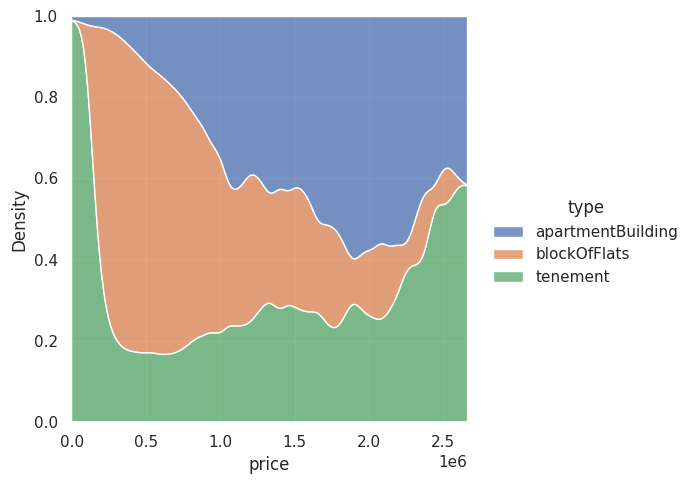

In [ ]:
sns.displot(data = df_p.sort_values('type', ascending = True), x = 'price', hue = 'type', multiple = "fill", kind = "kde")

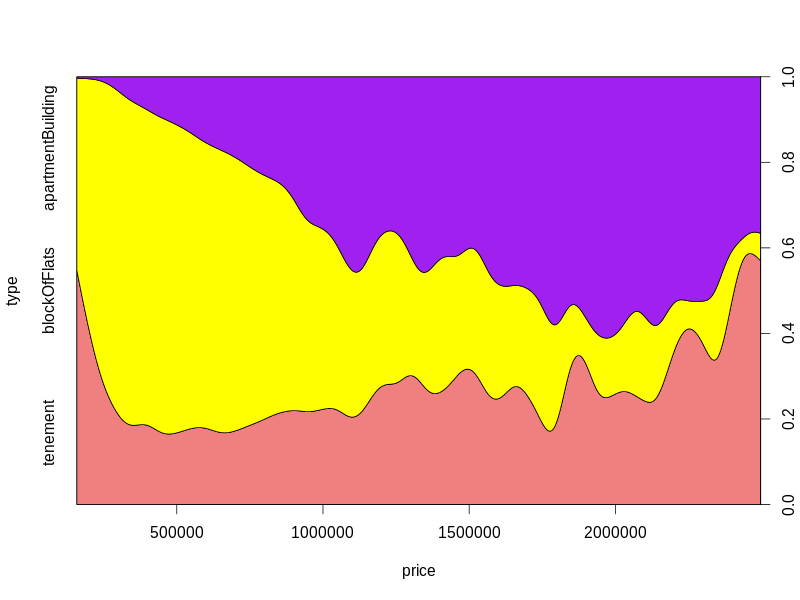

In [ ]:
%%R -w 800 -h 600
data = subset(df_r, sapply(type, nchar) > 0, select = c('type', "price"))
data$type <- as.factor(data$type)
old.par <- par(no.readonly = TRUE)
par(cex=1.3)
cdplot(type ~ price, data=data, col = c("lightcoral", "yellow", "purple"))
par(old.par)

Можно сделать вывод, что квартиры в домах типа block of flats имеют более низкую цену

#3. Проверка, являются ли наблюдения выбросами с точки зрения формальных статистических критериев Граббса и Q-теста Диксона. Визуализация результатов.

##Тест Граббса

Проведём тест Граббса для данных о цене на жильё

In [ ]:
from outliers import smirnov_grubbs as grubbs

len(grubbs.max_test_indices(np.array(df_p.price), alpha=0.01))

30

In [ ]:
%%R
#install.packages("outliers")
library(outliers)


Error in library(outliers) : there is no package called ‘outliers’


In [ ]:
%%R
grubbs.test(df_r$price)


Error in grubbs.test(df_r$price) : could not find function "grubbs.test"


In [ ]:
df_p.loc[list(grubbs.max_test_indices(np.array(df_p.price), alpha=0.01)),\
         ['price', 'city', 'type', 'rooms', 'centreDistance', 'poiCount', 'buildYear', 'condition', 'latitude', 'longitude']].sort_values("price", ascending=False).head(30)

,price,city,type,rooms,centreDistance,poiCount,buildYear,condition,latitude,longitude
11230,2500000,warszawa,apartmentBuilding,3.0,2.29,41.0,2007.0,premium,52.252296,21.003000
11655,2500000,warszawa,NaN,3.0,2.23,24.0,1930.0,NaN,52.226570,21.035190
11882,2500000,warszawa,apartmentBuilding,4.0,1.27,53.0,2013.0,NaN,52.230200,20.985100
12895,2500000,warszawa,NaN,4.0,10.58,3.0,1998.0,NaN,52.137854,21.029123
13369,2500000,warszawa,NaN,5.0,0.94,122.0,1900.0,NaN,52.235190,21.016220
14440,2500000,warszawa,apartmentBuilding,6.0,6.27,24.0,2000.0,premium,52.186017,21.057384
15714,2500000,warszawa,apartmentBuilding,6.0,5.31,22.0,2000.0,NaN,52.185419,21.022382
15815,2500000,warszawa,blockOfFlats,4.0,2.22,55.0,1978.0,premium,52.251660,21.005130
15867,2500000,warszawa,tenement,5.0,1.70,54.0,1937.0,premium,52.218510,21.016245
11286,2500000,warszawa,tenement,6.0,1.49,12.0,1924.0,NaN,52.218340,21.005540


In [ ]:
%%R
subset(df_r[c('price', 'city', 'type', 'rooms', 'buildYear', 'condition')], df_r$price == 25 * 10**5)

        price     city              type rooms buildYear condition
11231 2500000 warszawa apartmentBuilding     3      2007   premium
11287 2500000 warszawa          tenement     6      1924          
11656 2500000 warszawa                       3      1930          
11883 2500000 warszawa apartmentBuilding     4      2013          
12896 2500000 warszawa                       4      1998          
13370 2500000 warszawa                       5      1900          
14441 2500000 warszawa apartmentBuilding     6      2000   premium
15715 2500000 warszawa apartmentBuilding     6      2000          
15816 2500000 warszawa      blockOfFlats     4      1978   premium
15868 2500000 warszawa          tenement     5      1937   premium


В выбросы попали только дома Варшавы premium класса, в основном давностью постройки от 70 лет, площадью более 90 квадратных метров.

In [ ]:
len(grubbs.max_test_indices(np.array(df_p.poiCount), alpha=0.01))

304

In [ ]:
%%R
grubbs.test(df_r$poiCount)

  could not find function "grubbs.test"




Error in grubbs.test(df_r$poiCount) : 
  could not find function "grubbs.test"


In [ ]:
df_p.loc[list(grubbs.max_test_indices(np.array(df_p.poiCount), alpha=0.01)),\
        ['price', 'city', 'type','poiCount', 'rooms', 'centreDistance', 'buildYear', 'condition', 'latitude', 'longitude']].sort_values("poiCount", ascending=False)

,price,city,type,poiCount,rooms,centreDistance,buildYear,condition,latitude,longitude
3578,1557500,krakow,tenement,208.0,2.0,0.74,NaN,low,50.061897,19.936756
3134,799000,krakow,NaN,206.0,4.0,0.75,NaN,NaN,50.061947,19.936856
1492,1100000,krakow,blockOfFlats,206.0,3.0,0.75,1960.0,NaN,50.061947,19.936856
1741,1450000,krakow,tenement,202.0,3.0,0.59,NaN,NaN,50.060562,19.937711
2915,650000,krakow,tenement,202.0,2.0,0.59,1920.0,low,50.060562,19.937711
...,...,...,...,...,...,...,...,...,...,...
3901,449667,poznan,tenement,109.0,2.0,0.67,1920.0,NaN,52.403970,16.928170
13507,2150000,warszawa,NaN,109.0,5.0,0.74,NaN,NaN,52.226950,21.011100
12987,960000,warszawa,blockOfFlats,108.0,2.0,1.27,2016.0,NaN,52.222300,21.014100
14793,1895000,warszawa,tenement,108.0,3.0,0.84,1904.0,premium,52.225348,21.010183


In [ ]:
%%R
subset(df_r[c('price', 'city', 'type', 'poiCount', 'buildYear', 'centreDistance')], (df_r$poiCount >= 140) & (df_r$centreDistance <= 0.5))

       price    city              type poiCount buildYear centreDistance
1665  912600  krakow          tenement      142        NA           0.35
1698  501600  krakow          tenement      140      1893           0.38
2710 1499000  krakow          tenement      140      1898           0.48
2760  720000  krakow          tenement      143      1880           0.37
2850 1200000  krakow          tenement      140      1930           0.42
2999  606000  krakow          tenement      148      1890           0.48
3009  585000  krakow          tenement      148      1890           0.48
3279  572000  krakow          tenement      144      1930           0.37
3302  898500  krakow          tenement      143        NA           0.36
3310 1250000  krakow      blockOfFlats      147      2007           0.50
3428  898560  krakow          tenement      142      1905           0.35
3472 1700000  krakow          tenement      149      1908           0.50
3506 1244565  krakow          tenement      145    

Выбросами в данном случае считаются данные, которые принадлежат домам расположеным ближе, чем в 2 километрах от центра города, в основном в городах Краков и Варшава, а также принадлежащие преймущественно типу tenement.

##Q-Тест Диксона

В тесте Диксона размер выборки не должен привышать 30. Возьмём 20 случайных объявлений из Кракова и проведём тест для количества интересных мест в округе

In [ ]:
%%R
dixon.test(sample(x = subset(df_r, df_r$city == 'krakow')$poiCount, size = 20))

  could not find function "dixon.test"




Error in dixon.test(sample(x = subset(df_r, df_r$city == "krakow")$poiCount,  : 
  could not find function "dixon.test"


Теперь проведём тот же тест для цен на жильё, выбрав 20 случайных предложений в Варшаве

In [ ]:
%%R
dixon.test(sample(x = subset(df_r, df_r$city == 'warszawa')$price, size = 20))

  could not find function "dixon.test"




Error in dixon.test(sample(x = subset(df_r, df_r$city == "warszawa")$price,  : 
  could not find function "dixon.test"


#4. Воспользоваться инструментами для заполнения пропусков в данных. Пропуски внести вручную и сравнить результаты заполнения с истинными значениями.

In [ ]:
df_cp_p = df_p.copy()
indxs_with_gaps_p = df_cp_p.sample(800).index

In [ ]:
%%R -i indxs_with_gaps_p
#install.packages("quantmod")
library(quantmod)


Error in library(quantmod) : there is no package called ‘quantmod’


In [ ]:
%%R
df_cp_r <- data.frame(df_r)
indxs_with_gaps_r <- indxs_with_gaps_p

Добавим заполним столбец площади пустыми значениями и проверим их наличие.

In [ ]:
df_cp_p.loc[indxs_with_gaps_p, 'squareMeters'] = np.nan
df_p.squareMeters.isna().sum(), df_cp_p.squareMeters.isna().sum()

(0, 800)

In [ ]:
%%R
df_cp_r[indxs_with_gaps_r, c('squareMeters')] <- NA
print(c(sum(is.na(df_r[indxs_with_gaps_r, c('squareMeters')])), sum(is.na(df_cp_r[indxs_with_gaps_r, c('squareMeters')]))))

[1]   0 800


Оценку качества заполнения пропусков будме производить с помощью метрики MSE.

In [ ]:
from sklearn.metrics import mean_squared_error as mse

Заполним пропуски нулевыми значениями.

In [ ]:
df_cp_p.squareMeters.fillna(0, inplace=True)
mse_fill_0 = mse(df_cp_p.loc[indxs_with_gaps_p, 'squareMeters'].values, df_p.loc[indxs_with_gaps_p, 'squareMeters'].values)
print(f"{mse_fill_0=}")

mse_fill_0=4036.306014125


In [ ]:
%%R
#install.packages("Metrics")
library("Metrics")


Error in library("Metrics") : there is no package called ‘Metrics’


In [ ]:
%%R
df_cp_r[c('squareMeters')][is.na(df_cp_r[c('squareMeters')])] <- 0
mse(df_r[indxs_with_gaps_r, c('squareMeters')], df_cp_r[indxs_with_gaps_r, c('squareMeters')])

  could not find function "mse"




Error in mse(df_r[indxs_with_gaps_r, c("squareMeters")], df_cp_r[indxs_with_gaps_r,  : 
  could not find function "mse"


Заполним пропущенные значения средним, медианой и модой. Сравним метрики.

In [ ]:
df_cp_p.loc[indxs_with_gaps_p,'squareMeters'] = np.nan
mean = df_p.squareMeters.mean()
median = df_p.squareMeters.median()
mode = df_p.squareMeters.mode()[0]

In [ ]:
df_cp_p.loc[indxs_with_gaps_p, 'squareMeters'] = mean
mse_fill_mean = mse(df_cp_p.loc[indxs_with_gaps_p, 'squareMeters'].values, df_p.loc[indxs_with_gaps_p, 'squareMeters'].values)

df_cp_p.loc[indxs_with_gaps_p, 'squareMeters'] = median
mse_fill_median = mse(df_cp_p.loc[indxs_with_gaps_p, 'squareMeters'].values, df_p.loc[indxs_with_gaps_p, 'squareMeters'].values)

df_cp_p.loc[indxs_with_gaps_p,'squareMeters'] = mode
mse_fill_mode = mse(df_cp_p.loc[indxs_with_gaps_p, 'squareMeters'].values, df_p.loc[indxs_with_gaps_p, 'squareMeters'].values)

print(f"{mse_fill_mean = }\n{mse_fill_median = }\n{mse_fill_mode = }")

mse_fill_mean = 457.8170862350796
mse_fill_median = 478.67996837500004
mse_fill_mode = 933.551864125


In [ ]:
%%R
df_cp_r[indxs_with_gaps_r, c('squareMeters')] <- NA
mean <- mean(df_r$squareMeters, na.rm=TRUE)
median <- median(df_r$squareMeters, na.rm=TRUE)

In [ ]:
%%R -i mode
df_cp_r[indxs_with_gaps_r, c('squareMeters')] <- mean
mse_fill_mean <- mse(df_r[indxs_with_gaps_r, c('squareMeters')], df_cp_r[indxs_with_gaps_r, c('squareMeters')])

df_cp_r[indxs_with_gaps_r, c('squareMeters')] <- median
mse_fill_median <- mse(df_r[indxs_with_gaps_r, c('squareMeters')], df_cp_r[indxs_with_gaps_r, c('squareMeters')])

df_cp_r[indxs_with_gaps_r, c('squareMeters')] <- mode
mse_fill_mode <- mse(df_r[indxs_with_gaps_r, c('squareMeters')], df_cp_r[indxs_with_gaps_r, c('squareMeters')])

print(glue("mse_fill_mean = {mse_fill_mean}\n mse_fill_median = {mse_fill_median}\n mse_fill_mode = {mse_fill_mode}"))

  could not find function "mse"




Error in mse(df_r[indxs_with_gaps_r, c("squareMeters")], df_cp_r[indxs_with_gaps_r,  : 
  could not find function "mse"


В данном случае самым эффективным методом заполнения пропусков является среднее значение.

#5. Сгенерировать данные из нормального распределения с различными параметрами и провести анализ с помощью:  
- **графиков эмпирических функций распределений**  
- **квантилей**  
- **метода огибающих**  
- **стандартных процедур проверки гипотез о нормальности (критерии Колмогорова-Смирнова, ШапироУилка, Андерсона-Дарлинга, Крамера фон Мизеса, Колмогорова-Смирнова в модификации Лиллиефорса и Шапиро-Франсия)**

Сгенерируем выборки $N(0, 1), N(20, 100), N(100, 400)$ объёмами 50 и 1000

In [ ]:
np.random.seed(2326)

sizes = [50, 1000]
locs = [0, 20, 100]
scales = [1, 10, 20]
samples_small = np.zeros((3, 50), 'float64')
samples_big = np.zeros((3, 1000), 'float64')

for i in range(len(locs)):
    samples_big[i] = norm.rvs(locs[i], scales[i], sizes[1])
    samples_small[i] = norm.rvs(locs[i], scales[i], sizes[0])

In [ ]:
%%R
set.seed(2326)

sample1 <- rnorm(50, 0, 1)
sample2 <- rnorm(50, 20, 10)
sample3 <- rnorm(50, 100, 20)
sample4 <- rnorm(1000, 0, 1)
sample5 <- rnorm(1000, 20, 10)
sample6 <- rnorm(1000, 100, 20)

##Эмпирические функции распределения

Найдём эмпирические функции распределения.

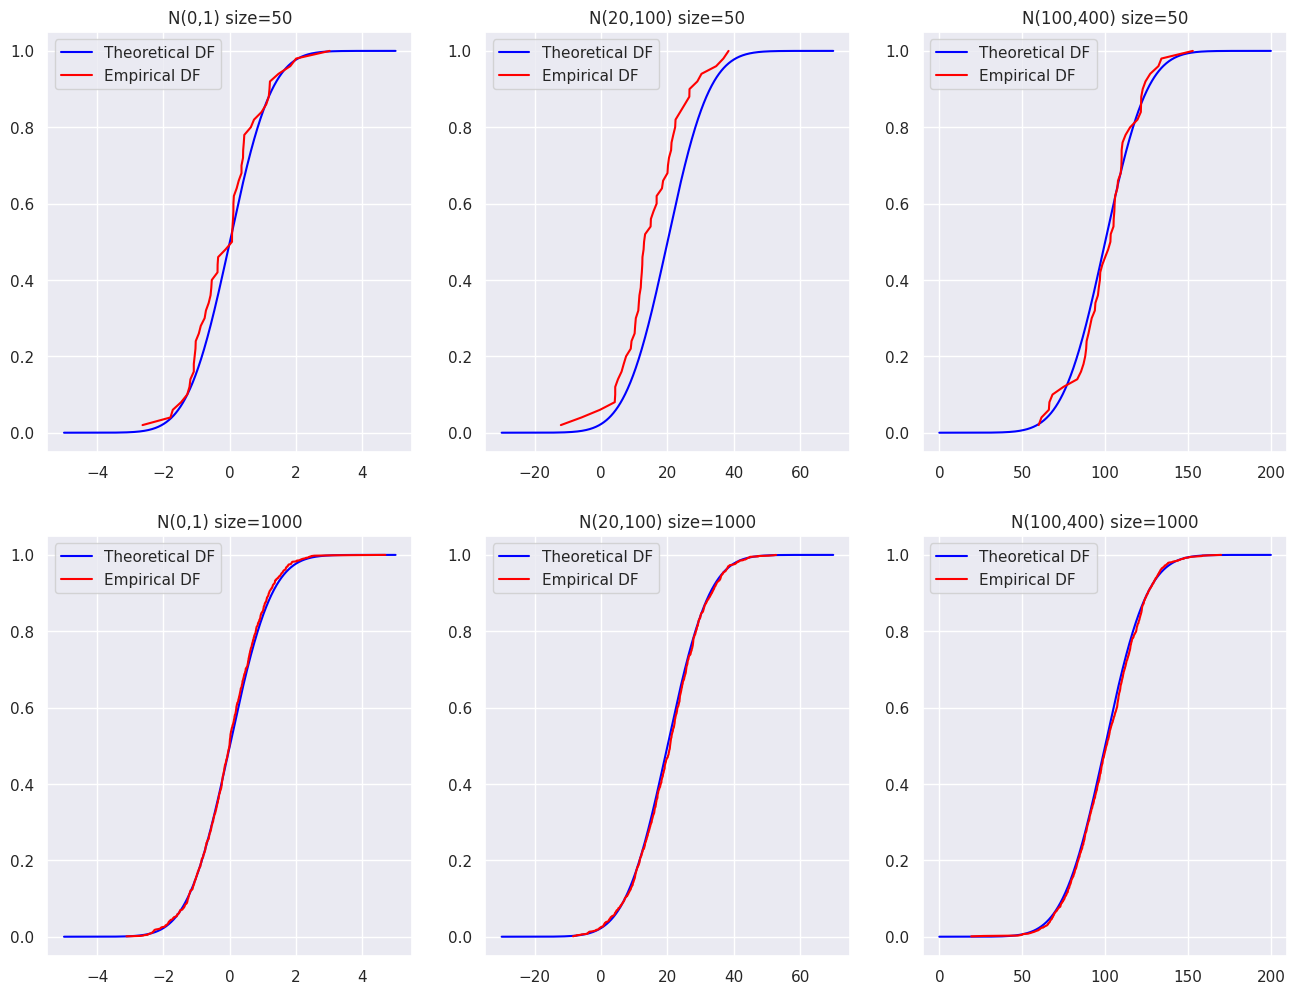

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF
sns.set_style("darkgrid")
f, axes = plt.subplots(2,3, figsize=(16, 12))

for j in range(len(sizes)):
    for i in range(len(locs)):
        if j:
            sample = samples_big[i]
        else:
            sample = samples_small[i]

        #Theoretical DF
        x_theor = np.linspace(locs[i] - 5 * scales[i],\
                              locs[i] + 5 * scales[i],\
                              num=1000)
        y_theor = norm.cdf(x_theor, locs[i], scales[i])
        sns.lineplot(x=x_theor, y=y_theor, color="blue", label='Theoretical DF', ax=axes[j, i])

        #Empirical DF
        ecdf = ECDF(sample)
        sns.lineplot(x=ecdf.x, y=ecdf.y, color="red", label="Empirical DF", ax=axes[j, i])

        plt.legend
        axes[j, i].title.set_text(f"N({locs[i]},{scales[i]**2}) size={sizes[j]}")

In [ ]:
%%R
graph_distr_fun <- function(sample, mean, scale, size){
    #Empirical DF
    plot(sort(sample), (1:size)/size, type="S", col="red", ylab="", xlab="",
        main=glue("N({mean}, {scale**2}) size={size}"), lwd = 3, cex.lab=1.5, cex.axis=1.5, cex.main=2)
    #Theoretical DF
    x = seq(mean - 5*scale, mean + 5*scale, by=1/100)
    lines(x, pnorm(x, mean=mean, sd=scale), type="l", col="blue", lwd=2)

    legend("bottomright", legend = c("Theoretical DF", "Empirical DF"),
            col = c("blue", "red"), lwd = 2)
}

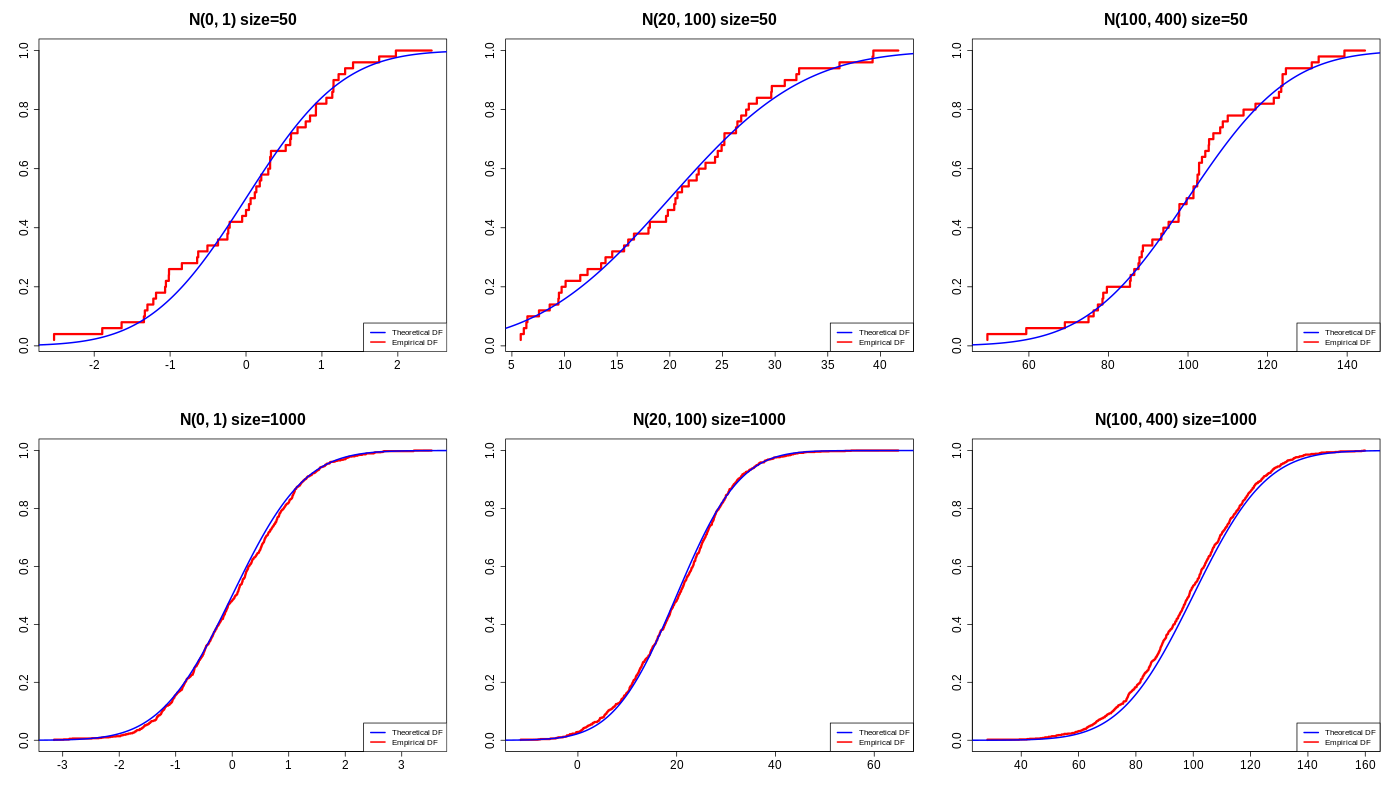

In [ ]:
%%R -w 1400 -h 800
layout(matrix(1:6, nrow = 2, byrow = TRUE))
graph1 <- graph_distr_fun(sample1, 0, 1, 50)
graph2 <- graph_distr_fun(sample2, 20, 10, 50)
graph3 <- graph_distr_fun(sample3, 100, 20, 50)
graph4 <- graph_distr_fun(sample4, 0, 1, 1000)
graph5 <- graph_distr_fun(sample5, 20, 10, 1000)
graph6 <- graph_distr_fun(sample6, 100, 20, 1000)

##QQplot

Построим QQplot.

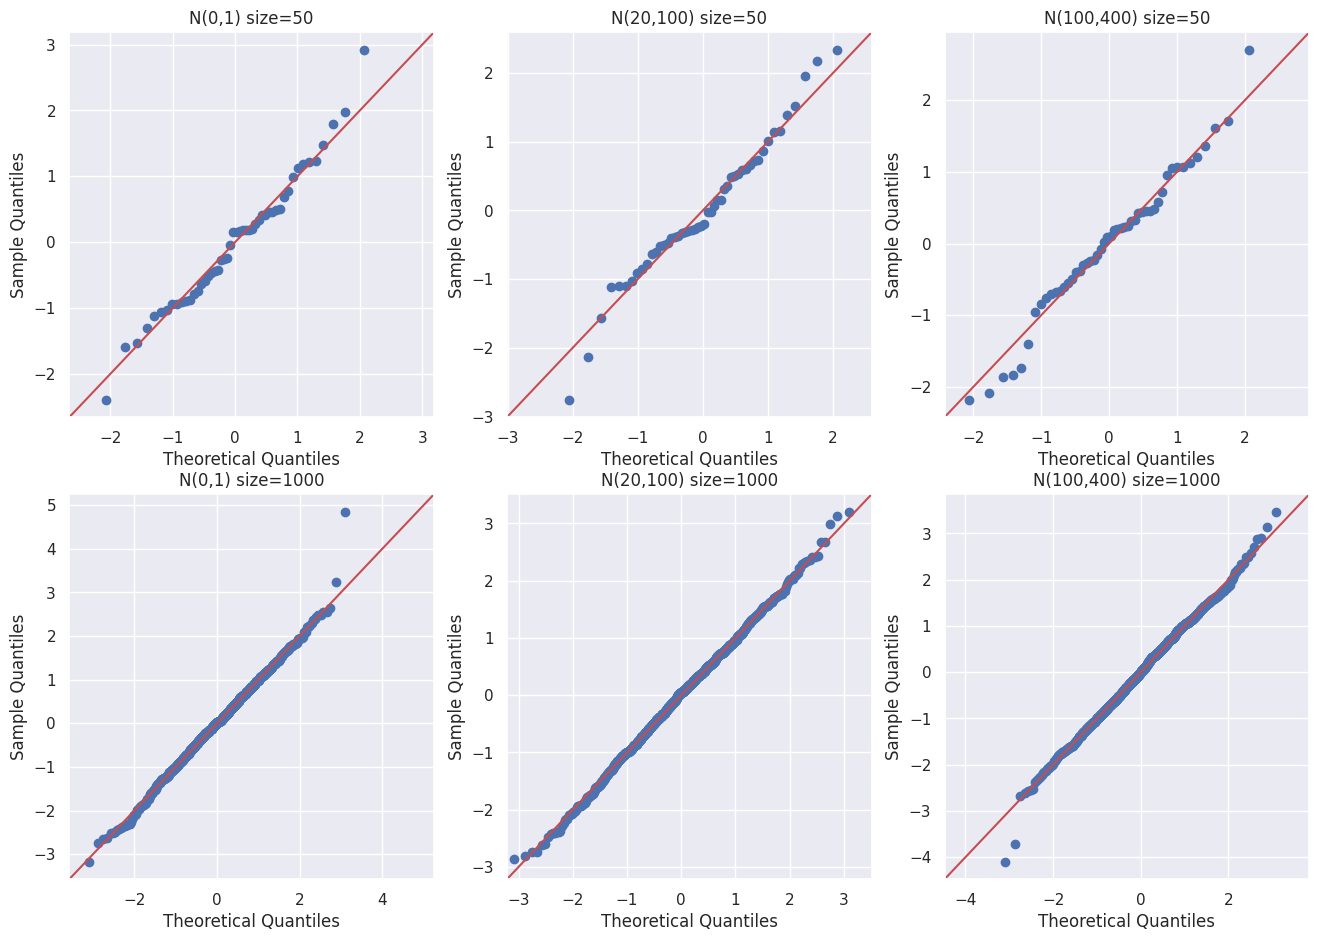

In [ ]:
from statsmodels.graphics.gofplots import qqplot
f, axes = plt.subplots(2,3, figsize=(16, 11))

for j in range(len(sizes)):
    for i in range(len(locs)):
        if j:
            sample = samples_big[i]
        else:
            sample = samples_small[i]

        qqplot(sample, fit=True, line="45",ax = axes[j, i]);
        axes[j, i].title.set_text(f"N({locs[i]},{scales[i]**2}) size={sizes[j]}")

In [ ]:
%%R
qqgraph <- function(sample){
    qqnorm(sample)
    qqline(sample, cex.lab=1.5, cex.axis=1.5, cex.main=2)
}

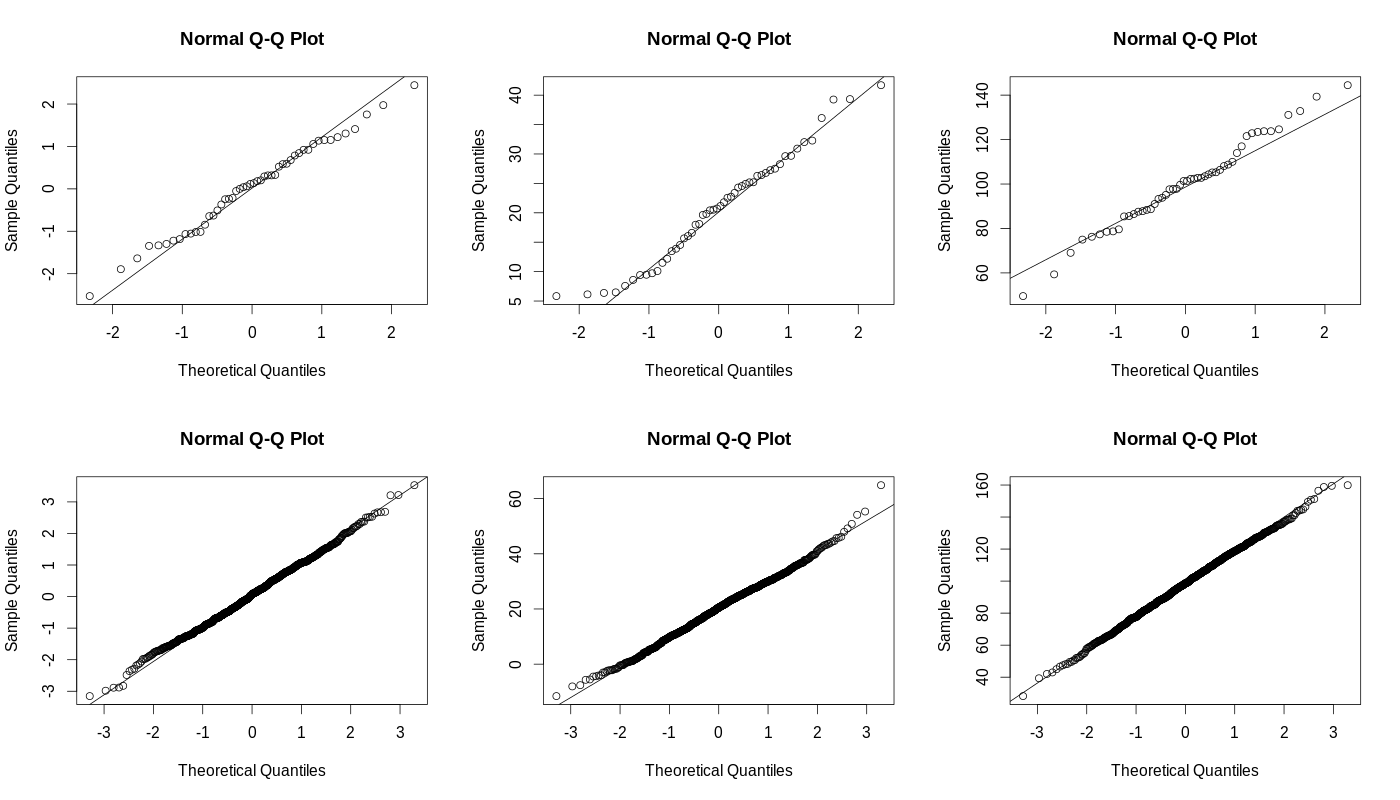

In [ ]:
%%R -w 1400 -h 800
layout(matrix(1:6, nrow = 2, byrow = TRUE))
old.par <- par(no.readonly = TRUE)
par(cex=1.3)
qqgraph(sample1)
qqgraph(sample2)
qqgraph(sample3)
qqgraph(sample4)
qqgraph(sample5)
qqgraph(sample6)
par(old.par)

##Метод огибающих

In [ ]:
%%R
envelmet <- function(x, mean, scale, size){
  z <- (x - mean(x))/sqrt(var(x))  #  Стандартизация выборки
  x.qq <- qqnorm(z, plot.it = FALSE)
  x.qq <- lapply(x.qq, sort)
  plot(x.qq, ylim = c(-10, 10),
        main=glue("N({mean}, {scale**2}) size={size}"), cex.lab=1.5, cex.axis=1.5, cex.main=2)
}

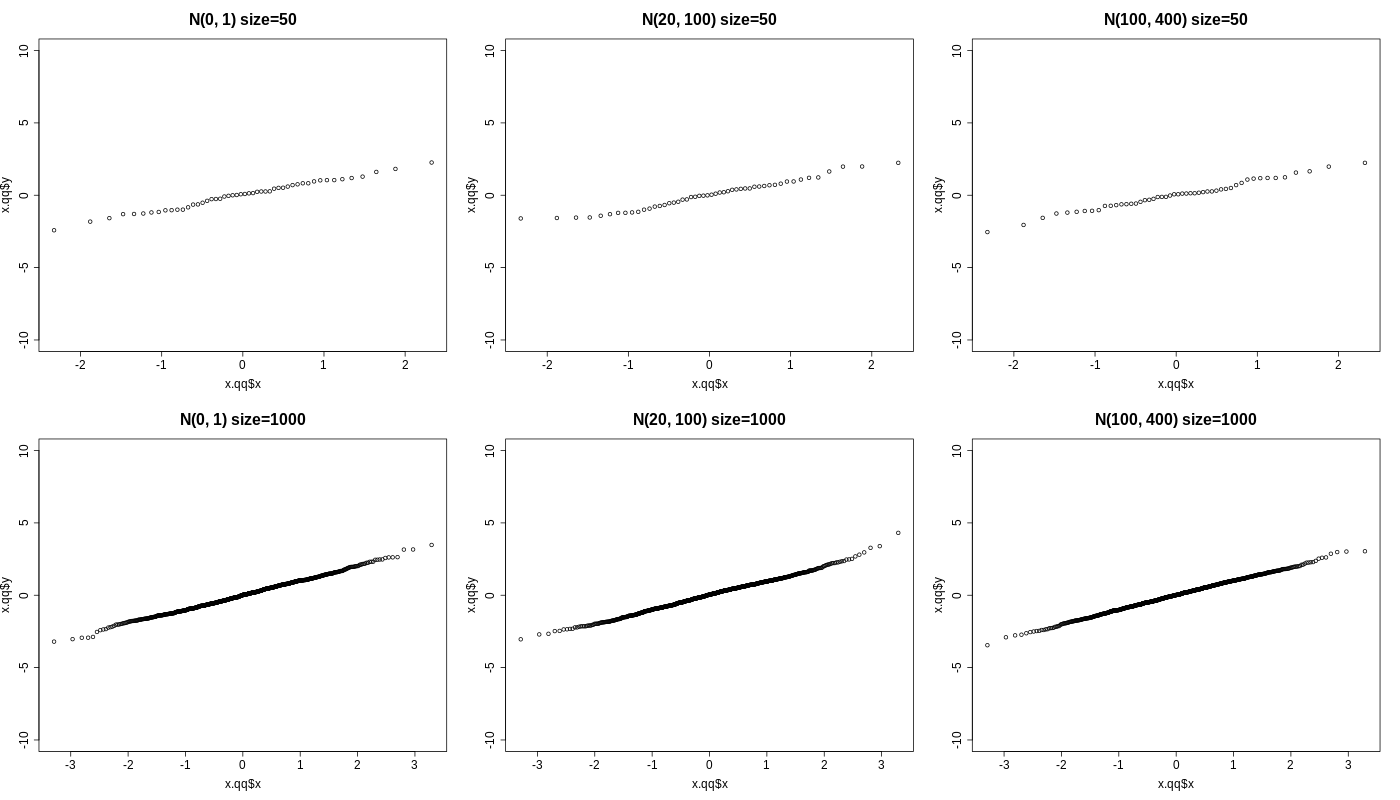

In [ ]:
%%R -w 1400 -h 800
layout(matrix(1:6, nrow = 2, byrow = TRUE))
envelmet(sample1, 0, 1, 50)
envelmet(sample2, 20, 10, 50)
envelmet(sample3, 100, 20, 50)
envelmet(sample4, 0, 1, 1000)
envelmet(sample5, 20, 10, 1000)
envelmet(sample6, 100, 20, 1000)

##Тест Колмогорова-Смирнова

In [ ]:
for j in range(len(sizes)):
    for i in range(len(locs)):
        if j:
            sample = samples_big[i]
        else:
            sample = samples_small[i]
        stat, pvalue = stats.kstest(sample, "norm", args=(locs[i], scales[i]))
        print(f"size = {sizes[j]}, mean = {locs[i]}, std = {scales[i]}\n{stat = }, {pvalue = }\n")

size = 50, mean = 0, std = 1
stat = 0.11087380395389412, pvalue = 0.5338428347822113

size = 50, mean = 20, std = 10
stat = 0.26963764718942473, pvalue = 0.0010601636489825372

size = 50, mean = 100, std = 20
stat = 0.09757644282275782, pvalue = 0.6912624236083804

size = 1000, mean = 0, std = 1
stat = 0.023816976233157705, pvalue = 0.6131150522766826

size = 1000, mean = 20, std = 10
stat = 0.037436392823974374, pvalue = 0.11821616338963825

size = 1000, mean = 100, std = 20
stat = 0.04049561991011552, pvalue = 0.07322881555579241



In [ ]:
%%R
print(ks.test(sample1, "pnorm", 0, 1))
print(ks.test(sample2, "pnorm", 20, 10))
print(ks.test(sample3, "pnorm", 100, 20))
print(ks.test(sample4, "pnorm", 0, 1))
print(ks.test(sample5, "pnorm", 20, 10))
print(ks.test(sample6, "pnorm", 100, 20))


	Exact one-sample Kolmogorov-Smirnov test

data:  sample1
D = 0.084781, p-value = 0.8352
alternative hypothesis: two-sided


	Exact one-sample Kolmogorov-Smirnov test

data:  sample2
D = 0.085634, p-value = 0.8264
alternative hypothesis: two-sided


	Exact one-sample Kolmogorov-Smirnov test

data:  sample3
D = 0.075667, p-value = 0.9163
alternative hypothesis: two-sided


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  sample4
D = 0.035083, p-value = 0.1705
alternative hypothesis: two-sided


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  sample5
D = 0.029701, p-value = 0.3409
alternative hypothesis: two-sided


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  sample6
D = 0.042273, p-value = 0.05609
alternative hypothesis: two-sided



##Тест Андерсона-Дарлинга

***Замечание***: statsmodels.stats.diagnostic.normal_ad возьмёт в качестве параметров распределия  
выборочное среднее и несмещённое стандартное отклонение

In [ ]:
from statsmodels.stats.diagnostic import normal_ad as ad_test
for j in range(len(sizes)):
    for i in range(len(locs)):
        if j:
            sample = samples_big[i]
        else:
            sample = samples_small[i]
        stat, pvalue = ad_test(sample)
        print(f"size = {sizes[j]}, mean = {locs[i]}, std = {scales[i]}\n{stat = }, {pvalue = }\n")

size = 50, mean = 0, std = 1
stat = 0.3284757445725859, pvalue = 0.5090516315036815

size = 50, mean = 20, std = 10
stat = 0.39824534649817167, pvalue = 0.35367767079705487

size = 50, mean = 100, std = 20
stat = 0.36570718892997434, pvalue = 0.4220963189661951

size = 1000, mean = 0, std = 1
stat = 0.26437094573930153, pvalue = 0.6960711193858642

size = 1000, mean = 20, std = 10
stat = 0.2939425945255607, pvalue = 0.5997004513100976

size = 1000, mean = 100, std = 20
stat = 0.3776037921613806, pvalue = 0.40805838472844136



In [ ]:
%%R
#install.packages("nortest")
library(nortest)


Error in library(nortest) : there is no package called ‘nortest’


In [ ]:
%%R
print(ad.test(sample1))
print(ad.test(sample2))
print(ad.test(sample3))
print(ad.test(sample4))
print(ad.test(sample5))
print(ad.test(sample6))


Error in ad.test(sample1) : could not find function "ad.test"


##Тест Крамера фон Мизеса

In [ ]:
for j in range(len(sizes)):
    for i in range(len(locs)):
        if j:
            sample = samples_big[i]
        else:
            sample = samples_small[i]
        stat, pvalue = stats.cramervonmises(sample, 'norm', args=(locs[i], scales[i])).statistic,\
                       stats.cramervonmises(sample, 'norm', args=(locs[i], scales[i])).pvalue
        print(f"N({locs[i]},{scales[i]}) size = {sizes[j]}\n{stat = }, {pvalue = }\n")

N(0,1) size = 50
stat = 0.12652494232185194, pvalue = 0.471115074223003

N(20,10) size = 50
stat = 1.254178992525729, pvalue = 0.0005647028245525654

N(100,20) size = 50
stat = 0.1031650067202192, pvalue = 0.5713490414786992

N(0,1) size = 1000
stat = 0.1331765266323705, pvalue = 0.44523128030753534

N(20,10) size = 1000
stat = 0.2287540197099889, pvalue = 0.21806376731801314

N(100,20) size = 1000
stat = 0.2767326345325909, pvalue = 0.15743226807609922



In [ ]:
%%R
print(cvm.test(sample1))
print(cvm.test(sample2))
print(cvm.test(sample3))
print(cvm.test(sample4))
print(cvm.test(sample5))
print(cvm.test(sample6))


Error in cvm.test(sample1) : could not find function "cvm.test"


##Тест Лиллиефорса

In [ ]:
from statsmodels.stats.diagnostic import lilliefors
for j in range(len(sizes)):
    for i in range(len(locs)):
        if j:
            sample = samples_big[i]
        else:
            sample = samples_small[i]
        stat, pvalue = lilliefors(sample)
        print(f"N({locs[i]},{scales[i]}) size = {sizes[j]}\n{stat = }, {pvalue = }\n")

N(0,1) size = 50
stat = 0.09094304530212571, pvalue = 0.38251689669786665

N(20,10) size = 50
stat = 0.09673490336287704, pvalue = 0.28509182667606436

N(100,20) size = 50
stat = 0.07740043368658167, pvalue = 0.6327170990270783

N(0,1) size = 1000
stat = 0.018134858368808904, pvalue = 0.6673259768130475

N(20,10) size = 1000
stat = 0.02356712959458329, pvalue = 0.24959686005445586

N(100,20) size = 1000
stat = 0.024223599927329253, pvalue = 0.22257001590548808



In [ ]:
%%R
print(lillie.test(sample1))
print(lillie.test(sample2))
print(lillie.test(sample3))
print(lillie.test(sample4))
print(lillie.test(sample5))
print(lillie.test(sample6))


Error in lillie.test(sample1) : could not find function "lillie.test"


##Тест Шапиро-Уилка

Тест имеет ограничение на объём выборки в 5000. Выбранные данные удовлетворяют ему.

In [ ]:
for j in range(len(sizes)):
    for i in range(len(locs)):
        if j:
            sample = samples_big[i]
        else:
            sample = samples_small[i]
        stat, pvalue = stats.shapiro(sample)
        print(f"N({locs[i]},{scales[i]}) size = {sizes[j]}\n{stat = }, {pvalue = }\n")

N(0,1) size = 50
stat = 0.9832391738891602, pvalue = 0.6940747499465942

N(20,10) size = 50
stat = 0.9803583025932312, pvalue = 0.5671716928482056

N(100,20) size = 50
stat = 0.9796738624572754, pvalue = 0.5382914543151855

N(0,1) size = 1000
stat = 0.9969052076339722, pvalue = 0.04884222522377968

N(20,10) size = 1000
stat = 0.9987080693244934, pvalue = 0.6939663290977478

N(100,20) size = 1000
stat = 0.9978259205818176, pvalue = 0.2171912044286728



In [ ]:
%%R
print(shapiro.test(sample1))
print(shapiro.test(sample2))
print(shapiro.test(sample3))
print(shapiro.test(sample4))
print(shapiro.test(sample5))
print(shapiro.test(sample6))


	Shapiro-Wilk normality test

data:  sample1
W = 0.98986, p-value = 0.9429


	Shapiro-Wilk normality test

data:  sample2
W = 0.97013, p-value = 0.2342


	Shapiro-Wilk normality test

data:  sample3
W = 0.98848, p-value = 0.9043


	Shapiro-Wilk normality test

data:  sample4
W = 0.99808, p-value = 0.3174


	Shapiro-Wilk normality test

data:  sample5
W = 0.99677, p-value = 0.03891


	Shapiro-Wilk normality test

data:  sample6
W = 0.99901, p-value = 0.8761



#6. Анализ данных с помощью графиков квантилей, метода огибающих, а также стандартных процедур проверки гипотез о нормальности на реальных данных

Построим графики квантилей для некоторых признаков (площадь, цена, расстояние до центра города, год постройки).

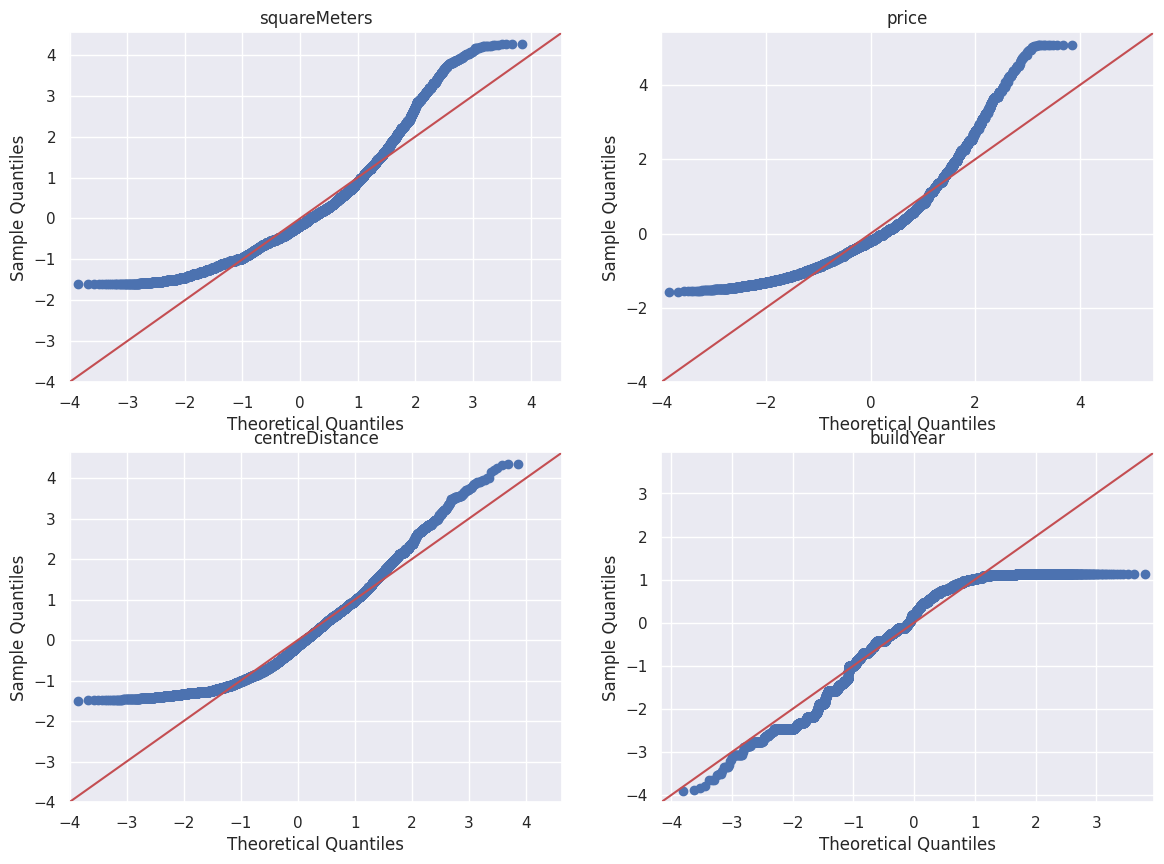

In [ ]:
f, axes = plt.subplots(2,2, figsize=(14, 10))

qqplot(df_p.squareMeters, fit=True, line="45",ax = axes[0, 0])
axes[0, 0].title.set_text("squareMeters")

qqplot(df_p.price, fit=True, line="45",ax = axes[0, 1])
axes[0, 1].title.set_text("price")

qqplot(df_p.centreDistance, fit=True, line="45",ax = axes[1, 0])
axes[1, 0].title.set_text("centreDistance")

qqplot(df_p.buildYear.dropna(), fit=True, line="45",ax = axes[1, 1])
axes[1, 1].title.set_text("buildYear")

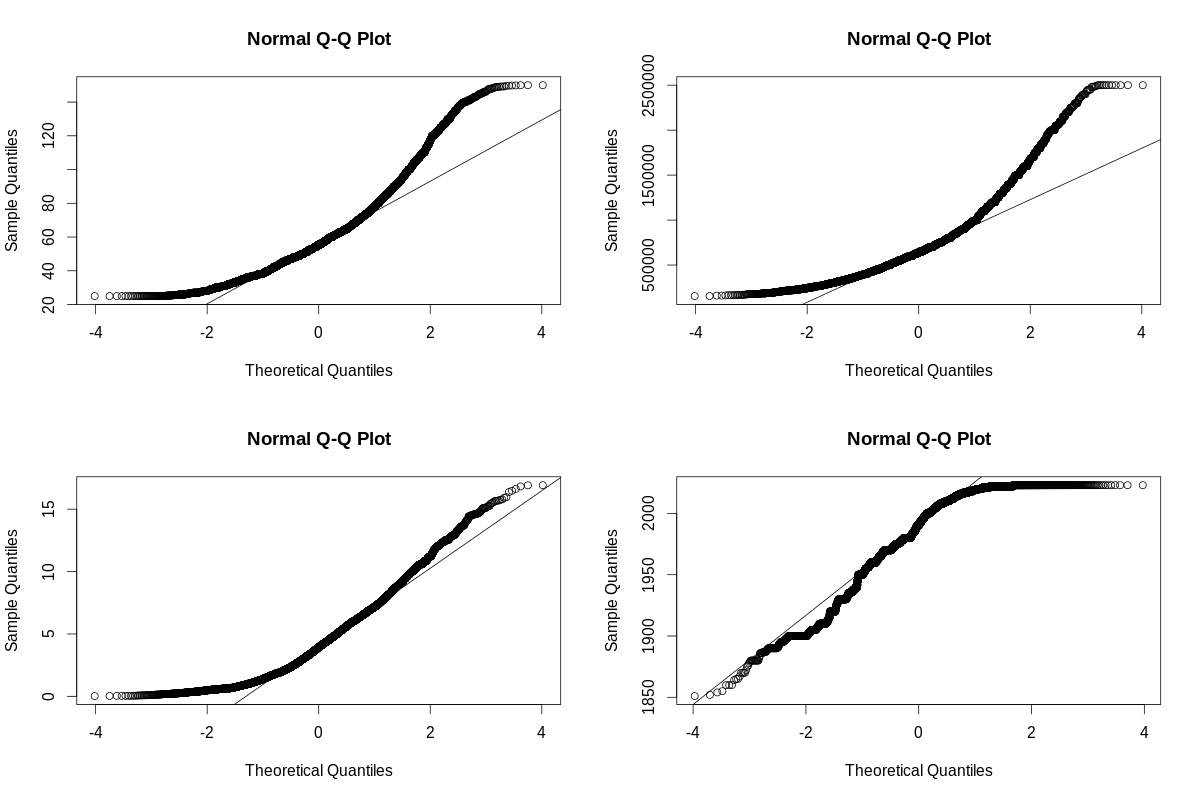

In [ ]:
%%R -w 1200 -h 800
layout(matrix(1:4, nrow = 2, byrow = TRUE))
old.par <- par(no.readonly = TRUE)
par(cex=1.3)
qqgraph(df_r$squareMeters)
qqgraph(df_r$price)
qqgraph(df_r$centreDistance)
qqgraph(na.omit(df_r$buildYear))
par(old.par)

Также построим графики методом огибающих

In [ ]:
%%R
envelmet_emp <- function(x){
  z <- (x - mean(x))/sqrt(var(x))  #  Стандартизация выборки
  x.qq <- qqnorm(z, plot.it = FALSE)
  x.qq <- lapply(x.qq, sort)
  plot(x.qq, ylim = c(-10, 10), cex.lab=1.5, cex.axis=1.5, cex.main=2)
}

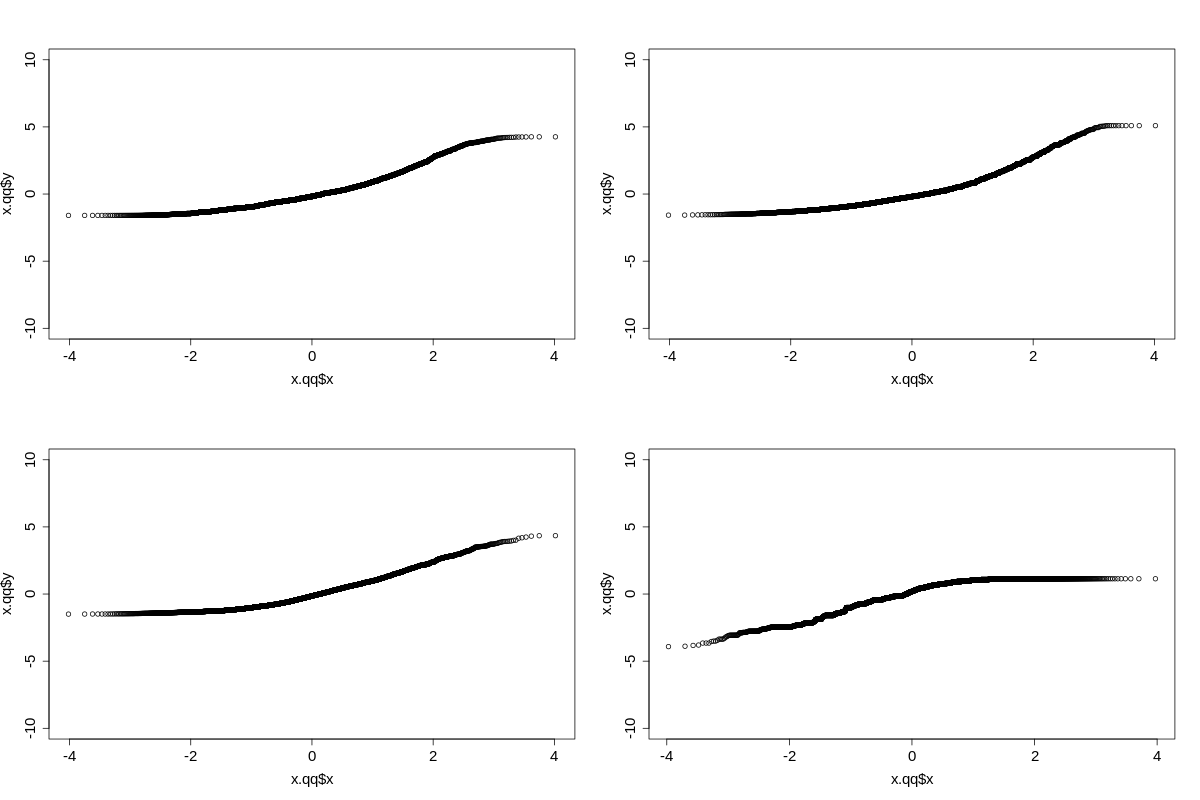

In [ ]:
%%R -w 1200 -h 800
layout(matrix(1:4, nrow = 2, byrow = TRUE))
envelmet_emp(df_r$squareMeters)
envelmet_emp(df_r$price)
envelmet_emp(df_r$centreDistance)
envelmet_emp(na.omit(df_r$buildYear))

Удалённость от центра города и год постройки являются признаками наиболее похожими на нормально распределённые.  
Проведём для них тесты на нориальность.

Создадим отдельно выборки для рассматриваемых признаков.

In [ ]:
sample_cdis = df_p.centreDistance
sample_bYear = df_p.buildYear.dropna()

In [ ]:
%%R
sample_cdis <- df_r$centreDistance
sample_bYear <- na.omit(df_r$buildYear)

##Тест Колмогорова-Смирнова

In [ ]:
stat, pvalue = stats.kstest(sample_cdis, "norm", args=(sample_cdis.mean(), sample_cdis.std(ddof=1)))
print(f"centreDistance: {stat = }, {pvalue = }\n")

stat, pvalue = stats.kstest(sample_bYear, "norm", args=(sample_bYear.mean(), sample_bYear.std(ddof=1)))
print(f"buildYear: {stat = }, {pvalue = }\n")

centreDistance: stat = 0.0727749118137541, pvalue = 9.974487396449419e-79

buildYear: stat = 0.12811809059290913, pvalue = 1.75513244106395e-201



In [ ]:
%%R
print(ks.test(sample_cdis, "pnorm", mean(sample_cdis), sd(sample_cdis)))
print(ks.test(sample_bYear, "pnorm", mean(sample_bYear), sd(sample_bYear)))


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  sample_cdis
D = 0.072775, p-value < 2.2e-16
alternative hypothesis: two-sided


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  sample_bYear
D = 0.12812, p-value < 2.2e-16
alternative hypothesis: two-sided



##Тест Андерсона-Дарлинга

In [ ]:
stat, pvalue = ad_test(sample_cdis)
print(f"centreDistance: {stat = }, {pvalue = }\n")

stat, pvalue = ad_test(sample_bYear)
print(f"buildYear: {stat = }, {pvalue = }\n")

centreDistance: stat = 214.59175769146532, pvalue = 0.0

buildYear: stat = 368.260234511843, pvalue = 0.0



In [ ]:
%%R
print(ad.test(sample_cdis))
print(ad.test(sample_bYear))


Error in ad.test(sample_cdis) : could not find function "ad.test"


##Тест Лиллиефорса

In [ ]:
stat, pvalue = lilliefors(sample_cdis)
print(f"centreDistance: {stat = }, {pvalue = }\n")

stat, pvalue = lilliefors(sample_bYear)
print(f"buildYear: {stat = }, {pvalue = }\n")

centreDistance: stat = 0.0727749118137541, pvalue = 0.0009999999999998899

buildYear: stat = 0.12811809059290913, pvalue = 0.0009999999999998899



In [ ]:
%%R
print(lillie.test(sample_cdis))
print(lillie.test(sample_bYear))


Error in lillie.test(sample_cdis) : could not find function "lillie.test"


##Тест Шапиро-Уилка

In [ ]:
stat, pvalue = stats.shapiro(sample_cdis)
print(f"centreDistance: {stat = }, {pvalue = }\n")

stat, pvalue = stats.shapiro(sample_bYear)
print(f"buildYear: {stat = }, {pvalue = }\n")

centreDistance: stat = 0.9440805912017822, pvalue = 0.0

buildYear: stat = 0.9068025350570679, pvalue = 0.0



In [ ]:
%%R
print(shapiro.test(sample(sample_cdis, 5000)))
print(shapiro.test(sample(sample_bYear, 5000)))


	Shapiro-Wilk normality test

data:  sample(sample_cdis, 5000)
W = 0.94546, p-value < 2.2e-16


	Shapiro-Wilk normality test

data:  sample(sample_bYear, 5000)
W = 0.90739, p-value < 2.2e-16



Из проведённых тестов можно заключить, что гиппотеза о том, что данные признаки имеют нормальное распределение неверна

#7. Продемонстрировать применение для проверки различных гипотез и различных доверительных уровней (0.9, 0.95, 0.99) следующих критериев:
- Стьюдента,  включая  односторонние  варианты,  когда проверяемая нулевая гипотеза заключается в том, что одно из сравниваемых средних  значений  больше  (или  меньше)  другого.  Реализовать  оценку мощности  критериев  при  заданном  объеме  выборки  или  определения объема выборки для достижения заданной мощности;
- Уилкоксона-Манна-Уитни (ранговые);
- Фишера,  Левене,  Бартлетта,  Флигнера-Килина  (проверка гипотез об однородности дисперсий).

##Критерий Стьюдента:


Критерий Стьюдента применяется к данным имеющим выборочное среднее с нормальным распределением (в случае малого размера выборки сами данные должны иметь нормальное распределение). Так как нормальности в данных не наблюдается, то проведём тест на сгенерированных данных. Присутствует проверка только одного одностороннего варианта, так как во втором гиппотезы просто поменяются местами.

Нулевая гиппотеза может выглядить следующим образом:  
- Средние значения двух выборок равны (`alternative = 'two-sided'`)
- Среднее значение первой выборки больше среднего значения второй выборки (`alternative = 'less'`)
- Среднее значение первой выборки меньше среднего значения второй выборки (`alternative = 'greater'`)   
Гиппотеза принимается, если p_value больше некоторого порога (в наших случаях 0.1, 0.05, 0.01) и нет оснований для принятия в обратном случае.

In [ ]:
#!pip install pingouin

In [ ]:
# генерация данных
np.random.seed(2326)

sizes = [100, 500, 1000, 3000]
locs = [0, 1, 5, 0]
scales = [4, 1, 1, 9]
samples = []

for i in range(len(locs)):
    samples.append(np.zeros((sizes[i]), 'float64'))
    samples[i] = norm.rvs(locs[i], scales[i], sizes[i])

In [ ]:
%%R
set.seed(2326)

sample0 <- rnorm(100, 0, 4)
sample1 <- rnorm(500, 1, 1)
sample2 <- rnorm(1000, 5, 1)
sample3 <- rnorm(3000, 0, 9)

###Доверительный уровень 0.9

In [ ]:
from pingouin import ttest
tests_greater = pd.DataFrame(columns=['sample', 'T', 'dof', 'alternative', 'p-val', 'CI90%', 'cohen-d', 'BF10','power'])
tests_two_sided = pd.DataFrame(columns=['sample', 'T', 'dof', 'alternative', 'p-val', 'CI90%', 'cohen-d', 'BF10','power'])
for i in range(1, 4):
    for j in range(i):
        tests_greater.loc[len(tests_greater.index)] = (ttest(samples[i], samples[j], alternative = 'greater', confidence = 0.9).reset_index(names = 'sample')).loc[0]
        tests_greater.at[len(tests_greater.index) - 1, 'sample'] = f"{i} vs {j}"
        tests_two_sided.loc[len(tests_two_sided.index)] = (ttest(samples[i], samples[j], alternative = 'two-sided', confidence = 0.9).reset_index(names = 'sample')).loc[0]
        tests_two_sided.at[len(tests_two_sided.index) - 1, 'sample'] = f"{i} vs {j}"

In [ ]:
tests_greater

,sample,T,dof,alternative,p-val,CI90%,cohen-d,BF10,power
0,1 vs 0,2.235435,101.414539,greater,0.013791,"[0.38537578401982825, inf]",0.483691,2.636,0.997159
1,2 vs 0,11.925883,100.155223,greater,0.0,"[4.321592376125052, inf]",3.16167,6.777e+27,1.0
2,2 vs 1,72.476062,979.7536,greater,0.0,"[3.8649960882271177, inf]",3.997484,inf,1.0
3,3 vs 0,-0.066155,133.067911,greater,0.526323,"[-0.5908330517231875, inf]",0.003295,0.225,0.046745
4,3 vs 1,-5.594723,3355.421228,greater,1.0,"[-1.1553926771498888, inf]",0.114307,1.795e-06,0.00003
5,3 vs 2,-29.560225,3208.561071,greater,1.0,"[-5.086019091394022, inf]",0.633095,9.0e-171,0.0


In [ ]:
tests_two_sided

,sample,T,dof,alternative,p-val,CI90%,cohen-d,BF10,power
0,1 vs 0,2.235435,101.414539,two-sided,0.027581,"[0.2345388917366889, 1.587779353856937]",0.483691,1.318,0.992825
1,2 vs 0,11.925883,100.155223,two-sided,0.0,"[4.171191932747913, 5.520359391744474]",3.16167,3.388e+27,1.0
2,2 vs 1,72.476062,979.7536,two-sided,0.0,"[3.8452353939591957, 4.023997684939565]",3.997484,inf,1.0
3,3 vs 0,-0.066155,133.067911,two-sided,0.947354,"[-0.7515937509083266, 0.693863487691102]",0.003295,0.113,0.05012
4,3 vs 1,-5.594723,3355.421228,two-sided,0.0,"[-1.2164685345468542, -0.6635799742639966]",0.114307,2.786e+05,0.657551
5,3 vs 2,-29.560225,3208.561071,two-sided,0.0,"[-5.1459643821554195, -4.603317205554195]",0.633095,5.555e+169,1.0


In [ ]:
%%R
print(t.test(x = sample1, y = sample0, alternative = 'greater', conf.level = 0.9))
print(t.test(x = sample2, y = sample0, alternative = 'greater', conf.level = 0.9))
print(t.test(x = sample2, y = sample1, alternative = 'greater', conf.level = 0.9))
print(t.test(x = sample3, y = sample0, alternative = 'greater', conf.level = 0.9))
print(t.test(x = sample3, y = sample1, alternative = 'greater', conf.level = 0.9))
print(t.test(x = sample3, y = sample2, alternative = 'greater', conf.level = 0.9))

print(t.test(x = sample1, y = sample0, alternative = 'two-sided', conf.level = 0.9))
print(t.test(x = sample2, y = sample0, alternative = 'two-sided', conf.level = 0.9))
print(t.test(x = sample2, y = sample1, alternative = 'two-sided', conf.level = 0.9))
print(t.test(x = sample3, y = sample0, alternative = 'two-sided', conf.level = 0.9))
print(t.test(x = sample3, y = sample1, alternative = 'two-sided', conf.level = 0.9))
print(t.test(x = sample3, y = sample2, alternative = 'two-sided', conf.level = 0.9))


	Welch Two Sample t-test

data:  sample1 and sample0
t = 1.9797, df = 101.51, p-value = 0.02522
alternative hypothesis: true difference in means is greater than 0
90 percent confidence interval:
 0.2762048       Inf
sample estimates:
mean of x mean of y 
1.0368424 0.2440731 


	Welch Two Sample t-test

data:  sample2 and sample0
t = 12.005, df = 100.33, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
90 percent confidence interval:
 4.278187      Inf
sample estimates:
mean of x mean of y 
5.0373470 0.2440731 


	Welch Two Sample t-test

data:  sample2 and sample1
t = 72.355, df = 1023.8, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
90 percent confidence interval:
 3.929602      Inf
sample estimates:
mean of x mean of y 
 5.037347  1.036842 


	Welch Two Sample t-test

data:  sample3 and sample0
t = -0.91178, df = 135.93, p-value = 0.8183
alternative hypothesis: true difference in means is greater than 0
90 pe

  'arg' should be one of “two.sided”, “less”, “greater”




Error in match.arg(alternative) : 
  'arg' should be one of “two.sided”, “less”, “greater”


###Доверительный уровень 0.95

In [ ]:
from pingouin import ttest
tests_greater = pd.DataFrame(columns=['sample', 'T', 'dof', 'alternative', 'p-val', 'CI90%', 'cohen-d', 'BF10','power'])
tests_two_sided = pd.DataFrame(columns=['sample', 'T', 'dof', 'alternative', 'p-val', 'CI90%', 'cohen-d', 'BF10','power'])
for i in range(1, 4):
    for j in range(i):
        tests_greater.loc[len(tests_greater.index)] = (ttest(samples[i], samples[j], alternative = 'greater', confidence = 0.95).reset_index(names = 'sample')).loc[0]
        tests_greater.at[len(tests_greater.index) - 1, 'sample'] = f"{i} vs {j}"
        tests_two_sided.loc[len(tests_two_sided.index)] = (ttest(samples[i], samples[j], alternative = 'two-sided', confidence = 0.95).reset_index(names = 'sample')).loc[0]
        tests_two_sided.at[len(tests_two_sided.index) - 1, 'sample'] = f"{i} vs {j}"

In [ ]:
tests_greater

,sample,T,dof,alternative,p-val,CI90%,cohen-d,BF10,power
0,1 vs 0,2.235435,101.414539,greater,0.013791,NaN,0.483691,2.636,0.997159
1,2 vs 0,11.925883,100.155223,greater,0.0,NaN,3.16167,6.777e+27,1.0
2,2 vs 1,72.476062,979.7536,greater,0.0,NaN,3.997484,inf,1.0
3,3 vs 0,-0.066155,133.067911,greater,0.526323,NaN,0.003295,0.225,0.046745
4,3 vs 1,-5.594723,3355.421228,greater,1.0,NaN,0.114307,1.795e-06,0.00003
5,3 vs 2,-29.560225,3208.561071,greater,1.0,NaN,0.633095,9.0e-171,0.0


In [ ]:
tests_two_sided

,sample,T,dof,alternative,p-val,CI90%,cohen-d,BF10,power
0,1 vs 0,2.235435,101.414539,two-sided,0.027581,NaN,0.483691,1.318,0.992825
1,2 vs 0,11.925883,100.155223,two-sided,0.0,NaN,3.16167,3.388e+27,1.0
2,2 vs 1,72.476062,979.7536,two-sided,0.0,NaN,3.997484,inf,1.0
3,3 vs 0,-0.066155,133.067911,two-sided,0.947354,NaN,0.003295,0.113,0.05012
4,3 vs 1,-5.594723,3355.421228,two-sided,0.0,NaN,0.114307,2.786e+05,0.657551
5,3 vs 2,-29.560225,3208.561071,two-sided,0.0,NaN,0.633095,5.555e+169,1.0


In [ ]:
%%R
print(t.test(x = sample1, y = sample0, alternative = 'greater', conf.level = 0.95))
print(t.test(x = sample2, y = sample0, alternative = 'greater', conf.level = 0.95))
print(t.test(x = sample2, y = sample1, alternative = 'greater', conf.level = 0.95))
print(t.test(x = sample3, y = sample0, alternative = 'greater', conf.level = 0.95))
print(t.test(x = sample3, y = sample1, alternative = 'greater', conf.level = 0.95))
print(t.test(x = sample3, y = sample2, alternative = 'greater', conf.level = 0.95))

print(t.test(x = sample1, y = sample0, alternative = 'two-sided', conf.level = 0.95))
print(t.test(x = sample2, y = sample0, alternative = 'two-sided', conf.level = 0.95))
print(t.test(x = sample2, y = sample1, alternative = 'two-sided', conf.level = 0.95))
print(t.test(x = sample3, y = sample0, alternative = 'two-sided', conf.level = 0.95))
print(t.test(x = sample3, y = sample1, alternative = 'two-sided', conf.level = 0.95))
print(t.test(x = sample3, y = sample2, alternative = 'two-sided', conf.level = 0.95))


	Welch Two Sample t-test

data:  sample1 and sample0
t = 1.9797, df = 101.51, p-value = 0.02522
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.1280143       Inf
sample estimates:
mean of x mean of y 
1.0368424 0.2440731 


	Welch Two Sample t-test

data:  sample2 and sample0
t = 12.005, df = 100.33, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 4.130399      Inf
sample estimates:
mean of x mean of y 
5.0373470 0.2440731 


	Welch Two Sample t-test

data:  sample2 and sample1
t = 72.355, df = 1023.8, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 3.909479      Inf
sample estimates:
mean of x mean of y 
 5.037347  1.036842 


	Welch Two Sample t-test

data:  sample3 and sample0
t = -0.91178, df = 135.93, p-value = 0.8183
alternative hypothesis: true difference in means is greater than 0
95 pe

  'arg' should be one of “two.sided”, “less”, “greater”




Error in match.arg(alternative) : 
  'arg' should be one of “two.sided”, “less”, “greater”


###Доверительный уровень 0.99

In [ ]:
from pingouin import ttest
tests_greater = pd.DataFrame(columns=['sample', 'T', 'dof', 'alternative', 'p-val', 'CI90%', 'cohen-d', 'BF10','power'])
tests_two_sided = pd.DataFrame(columns=['sample', 'T', 'dof', 'alternative', 'p-val', 'CI90%', 'cohen-d', 'BF10','power'])
for i in range(1, 4):
    for j in range(i):
        tests_greater.loc[len(tests_greater.index)] = (ttest(samples[i], samples[j], alternative = 'greater', confidence = 0.99).reset_index(names = 'sample')).loc[0]
        tests_greater.at[len(tests_greater.index) - 1, 'sample'] = f"{i} vs {j}"
        tests_two_sided.loc[len(tests_two_sided.index)] = (ttest(samples[i], samples[j], alternative = 'two-sided', confidence = 0.99).reset_index(names = 'sample')).loc[0]
        tests_two_sided.at[len(tests_two_sided.index) - 1, 'sample'] = f"{i} vs {j}"

In [ ]:
tests_greater

,sample,T,dof,alternative,p-val,CI90%,cohen-d,BF10,power
0,1 vs 0,2.235435,101.414539,greater,0.013791,NaN,0.483691,2.636,0.997159
1,2 vs 0,11.925883,100.155223,greater,0.0,NaN,3.16167,6.777e+27,1.0
2,2 vs 1,72.476062,979.7536,greater,0.0,NaN,3.997484,inf,1.0
3,3 vs 0,-0.066155,133.067911,greater,0.526323,NaN,0.003295,0.225,0.046745
4,3 vs 1,-5.594723,3355.421228,greater,1.0,NaN,0.114307,1.795e-06,0.00003
5,3 vs 2,-29.560225,3208.561071,greater,1.0,NaN,0.633095,9.0e-171,0.0


In [ ]:
tests_two_sided

,sample,T,dof,alternative,p-val,CI90%,cohen-d,BF10,power
0,1 vs 0,2.235435,101.414539,two-sided,0.027581,NaN,0.483691,1.318,0.992825
1,2 vs 0,11.925883,100.155223,two-sided,0.0,NaN,3.16167,3.388e+27,1.0
2,2 vs 1,72.476062,979.7536,two-sided,0.0,NaN,3.997484,inf,1.0
3,3 vs 0,-0.066155,133.067911,two-sided,0.947354,NaN,0.003295,0.113,0.05012
4,3 vs 1,-5.594723,3355.421228,two-sided,0.0,NaN,0.114307,2.786e+05,0.657551
5,3 vs 2,-29.560225,3208.561071,two-sided,0.0,NaN,0.633095,5.555e+169,1.0


In [ ]:
%%R
print(t.test(x = sample1, y = sample0, alternative = 'greater', conf.level = 0.99))
print(t.test(x = sample2, y = sample0, alternative = 'greater', conf.level = 0.99))
print(t.test(x = sample2, y = sample1, alternative = 'greater', conf.level = 0.99))
print(t.test(x = sample3, y = sample0, alternative = 'greater', conf.level = 0.99))
print(t.test(x = sample3, y = sample1, alternative = 'greater', conf.level = 0.99))
print(t.test(x = sample3, y = sample2, alternative = 'greater', conf.level = 0.99))

print(t.test(x = sample1, y = sample0, alternative = 'two-sided', conf.level = 0.99))
print(t.test(x = sample2, y = sample0, alternative = 'two-sided', conf.level = 0.99))
print(t.test(x = sample2, y = sample1, alternative = 'two-sided', conf.level = 0.99))
print(t.test(x = sample3, y = sample0, alternative = 'two-sided', conf.level = 0.99))
print(t.test(x = sample3, y = sample1, alternative = 'two-sided', conf.level = 0.99))
print(t.test(x = sample3, y = sample2, alternative = 'two-sided', conf.level = 0.99))


	Welch Two Sample t-test

data:  sample1 and sample0
t = 1.9797, df = 101.51, p-value = 0.02522
alternative hypothesis: true difference in means is greater than 0
99 percent confidence interval:
 -0.1537618        Inf
sample estimates:
mean of x mean of y 
1.0368424 0.2440731 


	Welch Two Sample t-test

data:  sample2 and sample0
t = 12.005, df = 100.33, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
99 percent confidence interval:
 3.849344      Inf
sample estimates:
mean of x mean of y 
5.0373470 0.2440731 


	Welch Two Sample t-test

data:  sample2 and sample1
t = 72.355, df = 1023.8, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
99 percent confidence interval:
 3.87168     Inf
sample estimates:
mean of x mean of y 
 5.037347  1.036842 


	Welch Two Sample t-test

data:  sample3 and sample0
t = -0.91178, df = 135.93, p-value = 0.8183
alternative hypothesis: true difference in means is greater than 0
99 pe

  'arg' should be one of “two.sided”, “less”, “greater”




Error in match.arg(alternative) : 
  'arg' should be one of “two.sided”, “less”, “greater”


##Критерий Уилкоксона-Мана-Уитни (ранговые)

Для применения критерия необходимо, чтобы в выборочных данных не было повторяющихся значений (если есть, то крайне мало). Так как в наших данных достаточно много повторяющихся значений, применим критерий к сгенерированным данным, также изменим несколько наборов с нормального распределения на пуассоновское

Нулевая гиппотеза может выглядить следующим образом:  
- Распределения двух выборок равны (`alternative = 'two-sided'`)
- Распределение первой выборки больше среднего значения второй выборки (`alternative = 'less'`)
- Распределение первой выборки меньше среднего значения второй выборки (`alternative = 'greater'`)   
Гиппотеза принимается, если p_value больше некоторого порога (в наших случаях 0.1, 0.05, 0.01) и нет оснований для принятия в обратном случае.

In [ ]:
samples[1], samples[2] = np.random.poisson(7, 14), np.random.poisson(7, 7)

In [ ]:
from scipy.stats import mannwhitneyu
for i in range(1, 4):
    for j in range(i):
        print(f'{i} vs {j} greater: ', mannwhitneyu(samples[i], samples[j], alternative='greater'))
        print(f'{i} vs {j} two-sided: ', mannwhitneyu(samples[i], samples[j], alternative='two-sided'))

1 vs 0 greater:  MannwhitneyuResult(statistic=1321.0, pvalue=4.2265613899621506e-08)
1 vs 0 two-sided:  MannwhitneyuResult(statistic=1321.0, pvalue=8.453122779924301e-08)
2 vs 0 greater:  MannwhitneyuResult(statistic=668.0, pvalue=3.1648098472479193e-05)
2 vs 0 two-sided:  MannwhitneyuResult(statistic=668.0, pvalue=6.329619694495839e-05)
2 vs 1 greater:  MannwhitneyuResult(statistic=38.5, pvalue=0.8003397978423863)
2 vs 1 two-sided:  MannwhitneyuResult(statistic=38.5, pvalue=0.4435488805303247)
3 vs 0 greater:  MannwhitneyuResult(statistic=149761.0, pvalue=0.5108502849426658)
3 vs 0 two-sided:  MannwhitneyuResult(statistic=149761.0, pvalue=0.978390015717345)
3 vs 1 greater:  MannwhitneyuResult(statistic=8559.0, pvalue=0.9999359198520004)
3 vs 1 two-sided:  MannwhitneyuResult(statistic=8559.0, pvalue=0.00012832071716620158)
3 vs 2 greater:  MannwhitneyuResult(statistic=4419.0, pvalue=0.9959831756989601)
3 vs 2 two-sided:  MannwhitneyuResult(statistic=4419.0, pvalue=0.008044020676708999)

In [ ]:
%%R
sample1 <- rpois(7, 14)
sample3 <- rpois(7, 7)
print(wilcox.test(x = sample1, y = sample0, alternative = 'greater', exact = FALSE, conf.int = TRUE, conf.level = 0.9))
print(wilcox.test(x = sample2, y = sample0, alternative = 'greater', exact = FALSE, conf.int = TRUE, conf.level = 0.9))
print(wilcox.test(x = sample2, y = sample1, alternative = 'greater', exact = FALSE, conf.int = TRUE, conf.level = 0.9))
print(wilcox.test(x = sample3, y = sample0, alternative = 'greater', exact = FALSE, conf.int = TRUE, conf.level = 0.9))
print(wilcox.test(x = sample3, y = sample1, alternative = 'greater', exact = FALSE, conf.int = TRUE, conf.level = 0.9))
print(wilcox.test(x = sample3, y = sample2, alternative = 'greater', exact = FALSE, conf.int = TRUE, conf.level = 0.9))

print(wilcox.test(x = sample1, y = sample0, alternative = 'two-sided', exact = FALSE, conf.int = TRUE, conf.level = 0.9))
print(wilcox.test(x = sample2, y = sample0, alternative = 'two-sided', exact = FALSE, conf.int = TRUE, conf.level = 0.9))
print(wilcox.test(x = sample2, y = sample1, alternative = 'two-sided', exact = FALSE, conf.int = TRUE, conf.level = 0.9))
print(wilcox.test(x = sample3, y = sample0, alternative = 'two-sided', exact = FALSE, conf.int = TRUE, conf.level = 0.9))
print(wilcox.test(x = sample3, y = sample1, alternative = 'two-sided', exact = FALSE, conf.int = TRUE, conf.level = 0.9))
print(wilcox.test(x = sample3, y = sample2, alternative = 'two-sided', exact = FALSE, conf.int = TRUE, conf.level = 0.9))


	Wilcoxon rank sum test with continuity correction

data:  sample1 and sample0
W = 700, p-value = 5.331e-06
alternative hypothesis: true location shift is greater than 0
90 percent confidence interval:
 12.85466      Inf
sample estimates:
difference in location 
              15.07034 


	Wilcoxon rank sum test with continuity correction

data:  sample2 and sample0
W = 88391, p-value < 2.2e-16
alternative hypothesis: true location shift is greater than 0
90 percent confidence interval:
 4.194643      Inf
sample estimates:
difference in location 
              4.582622 


	Wilcoxon rank sum test with continuity correction

data:  sample2 and sample1
W = 0, p-value = 1
alternative hypothesis: true location shift is greater than 0
90 percent confidence interval:
 -10.9998      Inf
sample estimates:
difference in location 
             -9.553894 


	Wilcoxon rank sum test with continuity correction

data:  sample3 and sample0
W = 665, p-value = 3.71e-05
alternative hypothesis: true locati

  'arg' should be one of “two.sided”, “less”, “greater”




Error in match.arg(alternative) : 
  'arg' should be one of “two.sided”, “less”, “greater”


In [ ]:
%%R
print(wilcox.test(x = sample1, y = sample0, alternative = 'greater', exact = FALSE, conf.int = TRUE, conf.level = 0.95))
print(wilcox.test(x = sample2, y = sample0, alternative = 'greater', exact = FALSE, conf.int = TRUE, conf.level = 0.95))
print(wilcox.test(x = sample2, y = sample1, alternative = 'greater', exact = FALSE, conf.int = TRUE, conf.level = 0.95))
print(wilcox.test(x = sample3, y = sample0, alternative = 'greater', exact = FALSE, conf.int = TRUE, conf.level = 0.95))
print(wilcox.test(x = sample3, y = sample1, alternative = 'greater', exact = FALSE, conf.int = TRUE, conf.level = 0.95))
print(wilcox.test(x = sample3, y = sample2, alternative = 'greater', exact = FALSE, conf.int = TRUE, conf.level = 0.95))

print(wilcox.test(x = sample1, y = sample0, alternative = 'two-sided', exact = FALSE, conf.int = TRUE, conf.level = 0.95))
print(wilcox.test(x = sample2, y = sample0, alternative = 'two-sided', exact = FALSE, conf.int = TRUE, conf.level = 0.95))
print(wilcox.test(x = sample2, y = sample1, alternative = 'two-sided', exact = FALSE, conf.int = TRUE, conf.level = 0.95))
print(wilcox.test(x = sample3, y = sample0, alternative = 'two-sided', exact = FALSE, conf.int = TRUE, conf.level = 0.95))
print(wilcox.test(x = sample3, y = sample1, alternative = 'two-sided', exact = FALSE, conf.int = TRUE, conf.level = 0.95))
print(wilcox.test(x = sample3, y = sample2, alternative = 'two-sided', exact = FALSE, conf.int = TRUE, conf.level = 0.95))


	Wilcoxon rank sum test with continuity correction

data:  sample1 and sample0
W = 700, p-value = 5.331e-06
alternative hypothesis: true location shift is greater than 0
95 percent confidence interval:
 12.12629      Inf
sample estimates:
difference in location 
              15.07034 


	Wilcoxon rank sum test with continuity correction

data:  sample2 and sample0
W = 88391, p-value < 2.2e-16
alternative hypothesis: true location shift is greater than 0
95 percent confidence interval:
 4.086068      Inf
sample estimates:
difference in location 
              4.582622 


	Wilcoxon rank sum test with continuity correction

data:  sample2 and sample1
W = 0, p-value = 1
alternative hypothesis: true location shift is greater than 0
95 percent confidence interval:
 -11.68636       Inf
sample estimates:
difference in location 
             -9.553894 


	Wilcoxon rank sum test with continuity correction

data:  sample3 and sample0
W = 665, p-value = 3.71e-05
alternative hypothesis: true loca

  'arg' should be one of “two.sided”, “less”, “greater”




Error in match.arg(alternative) : 
  'arg' should be one of “two.sided”, “less”, “greater”


In [ ]:
%%R
print(wilcox.test(x = sample1, y = sample0, alternative = 'greater', exact = FALSE, conf.int = TRUE, conf.level = 0.99))
print(wilcox.test(x = sample2, y = sample0, alternative = 'greater', exact = FALSE, conf.int = TRUE, conf.level = 0.99))
print(wilcox.test(x = sample2, y = sample1, alternative = 'greater', exact = FALSE, conf.int = TRUE, conf.level = 0.99))
print(wilcox.test(x = sample3, y = sample0, alternative = 'greater', exact = FALSE, conf.int = TRUE, conf.level = 0.99))
print(wilcox.test(x = sample3, y = sample1, alternative = 'greater', exact = FALSE, conf.int = TRUE, conf.level = 0.99))
print(wilcox.test(x = sample3, y = sample2, alternative = 'greater', exact = FALSE, conf.int = TRUE, conf.level = 0.99))

print(wilcox.test(x = sample1, y = sample0, alternative = 'two-sided', exact = FALSE, conf.int = TRUE, conf.level = 0.99))
print(wilcox.test(x = sample2, y = sample0, alternative = 'two-sided', exact = FALSE, conf.int = TRUE, conf.level = 0.99))
print(wilcox.test(x = sample2, y = sample1, alternative = 'two-sided', exact = FALSE, conf.int = TRUE, conf.level = 0.99))
print(wilcox.test(x = sample3, y = sample0, alternative = 'two-sided', exact = FALSE, conf.int = TRUE, conf.level = 0.99))
print(wilcox.test(x = sample3, y = sample1, alternative = 'two-sided', exact = FALSE, conf.int = TRUE, conf.level = 0.99))
print(wilcox.test(x = sample3, y = sample2, alternative = 'two-sided', exact = FALSE, conf.int = TRUE, conf.level = 0.99))


	Wilcoxon rank sum test with continuity correction

data:  sample1 and sample0
W = 700, p-value = 5.331e-06
alternative hypothesis: true location shift is greater than 0
99 percent confidence interval:
 11.08942      Inf
sample estimates:
difference in location 
              15.07034 


	Wilcoxon rank sum test with continuity correction

data:  sample2 and sample0
W = 88391, p-value < 2.2e-16
alternative hypothesis: true location shift is greater than 0
99 percent confidence interval:
 3.883896      Inf
sample estimates:
difference in location 
              4.582622 


	Wilcoxon rank sum test with continuity correction

data:  sample2 and sample1
W = 0, p-value = 1
alternative hypothesis: true location shift is greater than 0
99 percent confidence interval:
 -13.39681       Inf
sample estimates:
difference in location 
             -9.553894 


	Wilcoxon rank sum test with continuity correction

data:  sample3 and sample0
W = 665, p-value = 3.71e-05
alternative hypothesis: true loca

  'arg' should be one of “two.sided”, “less”, “greater”




Error in match.arg(alternative) : 
  'arg' should be one of “two.sided”, “less”, “greater”


##Критерии Фишера,  Левене,  Бартлетта,  Флигнера-Килина  (проверка гипотез об однородности дисперсий)

Нулевая гиппотеза может выглядить следующим образом:  
- Дисперсии двух выборок равны (`alternative = 'two-sided'`)
- Дисперсия первой выборки больше среднего значения второй выборки (`alternative = 'less'`)
- Дисперсия первой выборки меньше среднего значения второй выборки (`alternative = 'greater'`)   
Гиппотеза принимается, если p_value больше некоторого порога (в наших случаях 0.1, 0.05, 0.01) и нет оснований для принятия в обратном случае.

###Критерий Фишера

In [ ]:
# генерация данных
np.random.seed(2326)

sizes = [100, 500, 1000, 3000]
locs = [0, 1, 5, 0]
scales = [4, 1, 1, 9]
samples = []

for i in range(len(locs)):
    samples.append(np.zeros((sizes[i]), 'float64'))
    samples[i] = norm.rvs(locs[i], scales[i], sizes[i])

In [ ]:
%%R
#install.packages("ISwR")
library(ISwR)

In [ ]:
%%R
set.seed(2326)

sample0 <- rnorm(100, 0, 4)
sample1 <- rnorm(500, 1, 1)
sample2 <- rnorm(1000, 5, 1)
sample3 <- rnorm(3000, 0, 9)

####Доверительный уровень 0.9

In [ ]:
%%R
print(var.test(sample1, sample0,  alternative = 'greater', conf.level = 0.9))
print(var.test(sample2, sample0,  alternative = 'greater', conf.level = 0.9))
print(var.test(sample2, sample1,  alternative = 'greater', conf.level = 0.9))
print(var.test(sample3, sample0,  alternative = 'greater', conf.level = 0.9))
print(var.test(sample3, sample1,  alternative = 'greater', conf.level = 0.9))
print(var.test(sample3, sample2,  alternative = 'greater', conf.level = 0.9))


	F test to compare two variances

data:  sample1 and sample0
F = 0.063108, num df = 499, denom df = 99, p-value = 1
alternative hypothesis: true ratio of variances is greater than 1
90 percent confidence interval:
 0.05115771        Inf
sample estimates:
ratio of variances 
        0.06310802 


	F test to compare two variances

data:  sample2 and sample0
F = 0.066816, num df = 999, denom df = 99, p-value = 1
alternative hypothesis: true ratio of variances is greater than 1
90 percent confidence interval:
 0.05455615        Inf
sample estimates:
ratio of variances 
        0.06681636 


	F test to compare two variances

data:  sample2 and sample1
F = 1.0588, num df = 999, denom df = 499, p-value = 0.2341
alternative hypothesis: true ratio of variances is greater than 1
90 percent confidence interval:
 0.9574    Inf
sample estimates:
ratio of variances 
          1.058762 


	F test to compare two variances

data:  sample3 and sample0
F = 5.17, num df = 2999, denom df = 99, p-value < 2

In [ ]:
%%R
print(var.test(sample1, sample0,  alternative = 'two.sided', conf.level = 0.9))
print(var.test(sample2, sample0,  alternative = 'two.sided', conf.level = 0.9))
print(var.test(sample2, sample1,  alternative = 'two.sided', conf.level = 0.9))
print(var.test(sample3, sample0,  alternative = 'two.sided', conf.level = 0.9))
print(var.test(sample3, sample1,  alternative = 'two.sided', conf.level = 0.9))
print(var.test(sample3, sample2,  alternative = 'two.sided', conf.level = 0.9))


	F test to compare two variances

data:  sample1 and sample0
F = 0.063108, num df = 499, denom df = 99, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
90 percent confidence interval:
 0.04818982 0.08056137
sample estimates:
ratio of variances 
        0.06310802 


	F test to compare two variances

data:  sample2 and sample0
F = 0.066816, num df = 999, denom df = 99, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
90 percent confidence interval:
 0.05149634 0.08424310
sample estimates:
ratio of variances 
        0.06681636 


	F test to compare two variances

data:  sample2 and sample1
F = 1.0588, num df = 999, denom df = 499, p-value = 0.4683
alternative hypothesis: true ratio of variances is not equal to 1
90 percent confidence interval:
 0.9304466 1.2009828
sample estimates:
ratio of variances 
          1.058762 


	F test to compare two variances

data:  sample3 and sample0
F = 5.17, num df = 2999, denom df

####Доверительный уровень 0.95

In [ ]:
%%R
print(var.test(sample1, sample0,  alternative = 'greater', conf.level = 0.95))
print(var.test(sample2, sample0,  alternative = 'greater', conf.level = 0.95))
print(var.test(sample2, sample1,  alternative = 'greater', conf.level = 0.95))
print(var.test(sample3, sample0,  alternative = 'greater', conf.level = 0.95))
print(var.test(sample3, sample1,  alternative = 'greater', conf.level = 0.95))
print(var.test(sample3, sample2,  alternative = 'greater', conf.level = 0.95))


	F test to compare two variances

data:  sample1 and sample0
F = 0.063108, num df = 499, denom df = 99, p-value = 1
alternative hypothesis: true ratio of variances is greater than 1
95 percent confidence interval:
 0.04818982        Inf
sample estimates:
ratio of variances 
        0.06310802 


	F test to compare two variances

data:  sample2 and sample0
F = 0.066816, num df = 999, denom df = 99, p-value = 1
alternative hypothesis: true ratio of variances is greater than 1
95 percent confidence interval:
 0.05149634        Inf
sample estimates:
ratio of variances 
        0.06681636 


	F test to compare two variances

data:  sample2 and sample1
F = 1.0588, num df = 999, denom df = 499, p-value = 0.2341
alternative hypothesis: true ratio of variances is greater than 1
95 percent confidence interval:
 0.9304466       Inf
sample estimates:
ratio of variances 
          1.058762 


	F test to compare two variances

data:  sample3 and sample0
F = 5.17, num df = 2999, denom df = 99, p-val

In [ ]:
%%R
print(var.test(sample1, sample0,  alternative = 'two.sided', conf.level = 0.95))
print(var.test(sample2, sample0,  alternative = 'two.sided', conf.level = 0.95))
print(var.test(sample2, sample1,  alternative = 'two.sided', conf.level = 0.95))
print(var.test(sample3, sample0,  alternative = 'two.sided', conf.level = 0.95))
print(var.test(sample3, sample1,  alternative = 'two.sided', conf.level = 0.95))
print(var.test(sample3, sample2,  alternative = 'two.sided', conf.level = 0.95))


	F test to compare two variances

data:  sample1 and sample0
F = 0.063108, num df = 499, denom df = 99, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.0457243 0.0843816
sample estimates:
ratio of variances 
        0.06310802 


	F test to compare two variances

data:  sample2 and sample0
F = 0.066816, num df = 999, denom df = 99, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.04894523 0.08802028
sample estimates:
ratio of variances 
        0.06681636 


	F test to compare two variances

data:  sample2 and sample1
F = 1.0588, num df = 999, denom df = 499, p-value = 0.4683
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.9076092 1.2302652
sample estimates:
ratio of variances 
          1.058762 


	F test to compare two variances

data:  sample3 and sample0
F = 5.17, num df = 2999, denom df =

####Доверительный уровень 0.99

In [ ]:
%%R
print(var.test(sample1, sample0,  alternative = 'greater', conf.level = 0.99))
print(var.test(sample2, sample0,  alternative = 'greater', conf.level = 0.99))
print(var.test(sample2, sample1,  alternative = 'greater', conf.level = 0.99))
print(var.test(sample3, sample0,  alternative = 'greater', conf.level = 0.99))
print(var.test(sample3, sample1,  alternative = 'greater', conf.level = 0.99))
print(var.test(sample3, sample2,  alternative = 'greater', conf.level = 0.99))


	F test to compare two variances

data:  sample1 and sample0
F = 0.063108, num df = 499, denom df = 99, p-value = 1
alternative hypothesis: true ratio of variances is greater than 1
99 percent confidence interval:
 0.04298046        Inf
sample estimates:
ratio of variances 
        0.06310802 


	F test to compare two variances

data:  sample2 and sample0
F = 0.066816, num df = 999, denom df = 99, p-value = 1
alternative hypothesis: true ratio of variances is greater than 1
99 percent confidence interval:
 0.04609617        Inf
sample estimates:
ratio of variances 
        0.06681636 


	F test to compare two variances

data:  sample2 and sample1
F = 1.0588, num df = 999, denom df = 499, p-value = 0.2341
alternative hypothesis: true ratio of variances is greater than 1
99 percent confidence interval:
 0.8816724       Inf
sample estimates:
ratio of variances 
          1.058762 


	F test to compare two variances

data:  sample3 and sample0
F = 5.17, num df = 2999, denom df = 99, p-val

In [ ]:
%%R
print(var.test(sample1, sample0,  alternative = 'two.sided', conf.level = 0.99))
print(var.test(sample2, sample0,  alternative = 'two.sided', conf.level = 0.99))
print(var.test(sample2, sample1,  alternative = 'two.sided', conf.level = 0.99))
print(var.test(sample3, sample0,  alternative = 'two.sided', conf.level = 0.99))
print(var.test(sample3, sample1,  alternative = 'two.sided', conf.level = 0.99))
print(var.test(sample3, sample2,  alternative = 'two.sided', conf.level = 0.99))


	F test to compare two variances

data:  sample1 and sample0
F = 0.063108, num df = 499, denom df = 99, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
99 percent confidence interval:
 0.04118551 0.09226288
sample estimates:
ratio of variances 
        0.06310802 


	F test to compare two variances

data:  sample2 and sample0
F = 0.066816, num df = 999, denom df = 99, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
99 percent confidence interval:
 0.04422665 0.09575766
sample estimates:
ratio of variances 
        0.06681636 


	F test to compare two variances

data:  sample2 and sample1
F = 1.0588, num df = 999, denom df = 499, p-value = 0.4683
alternative hypothesis: true ratio of variances is not equal to 1
99 percent confidence interval:
 0.864383 1.289371
sample estimates:
ratio of variances 
          1.058762 


	F test to compare two variances

data:  sample3 and sample0
F = 5.17, num df = 2999, denom df =

###Критерий Левене

In [ ]:
from scipy.stats import levene
for i in range(1, 4):
    for j in range(i):
        print(f'{i} vs {j}: ', levene(samples[i], samples[j]))

1 vs 0:  LeveneResult(statistic=342.8682545300907, pvalue=7.583915079345819e-61)
2 vs 0:  LeveneResult(statistic=577.957049217283, pvalue=6.058120922567427e-103)
2 vs 1:  LeveneResult(statistic=0.00930545012648317, pvalue=0.9231643633187089)
3 vs 0:  LeveneResult(statistic=54.84956489786436, pvalue=1.668492187142074e-13)
3 vs 1:  LeveneResult(statistic=707.2120831019408, pvalue=4.4905795242012496e-142)
3 vs 2:  LeveneResult(statistic=1413.327295202246, pvalue=3.996238498657091e-265)


In [ ]:
%%R
#сформируем данные одинаковой длины (1000 элементов)
set.seed(2326)

sample0 <- rnorm(1000, 0, 4)
sample1 <- rnorm(1000, 1, 1)
sample2 <- rnorm(1000, 5, 1)

f0 <- rep(1, 1000)
f1 <- rep(2, 1000)
f2 <- rep(3, 1000)
factor0 <- as.factor(c(f0, f1, f2))


ff0 <- rep(1, 1000)
ff1 <- rep(2, 1000)
ff2 <- rep(3, 1000)
factor1 <- as.factor(c(ff0, ff1))
factor2 <- as.factor(c(ff0, ff2))
factor3 <- as.factor(c(ff1, ff2))

vec_norm0 <- c(sample0, sample1, sample2)
vec_norm1 <- c(sample0, sample1)
vec_norm2 <- c(sample0, sample2)
vec_norm3 <- c(sample1, sample2)

In [ ]:
%%R
#install.packages("car")
library(car)

In [ ]:
%%R
print(leveneTest(vec_norm0, factor0))
print(leveneTest(vec_norm1, factor1))
print(leveneTest(vec_norm2, factor2))
print(leveneTest(vec_norm3, factor3))

Levene's Test for Homogeneity of Variance (center = median)
        Df F value    Pr(>F)    
group    2  932.66 < 2.2e-16 ***
      2997                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Levene's Test for Homogeneity of Variance (center = median)
        Df F value    Pr(>F)    
group    1  984.47 < 2.2e-16 ***
      1998                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Levene's Test for Homogeneity of Variance (center = median)
        Df F value    Pr(>F)    
group    1  1000.6 < 2.2e-16 ***
      1998                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Levene's Test for Homogeneity of Variance (center = median)
        Df F value Pr(>F)
group    1  0.3413 0.5592
      1998               


###Критерий Бартлетта

In [ ]:
from scipy.stats import bartlett
for i in range(1, 4):
    for j in range(i):
        print(f'{i} vs {j}: ', bartlett(samples[i], samples[j]))

1 vs 0:  BartlettResult(statistic=480.6916970347654, pvalue=1.510887627448853e-106)
2 vs 0:  BartlettResult(statistic=704.0947014121402, pvalue=3.848469999857262e-155)
2 vs 1:  BartlettResult(statistic=0.2926656650383438, pvalue=0.5885173516636548)
3 vs 0:  BartlettResult(statistic=75.58222292575437, pvalue=3.505030261563395e-18)
3 vs 1:  BartlettResult(statistic=1648.3876241425844, pvalue=0.0)
3 vs 2:  BartlettResult(statistic=3272.734099184575, pvalue=0.0)


In [ ]:
%%R
print(bartlett.test(vec_norm0, factor0))
print(bartlett.test(vec_norm1, factor1))
print(bartlett.test(vec_norm2, factor2))
print(bartlett.test(vec_norm3, factor3))


	Bartlett test of homogeneity of variances

data:  vec_norm0 and factor0
Bartlett's K-squared = 2529.6, df = 2, p-value < 2.2e-16


	Bartlett test of homogeneity of variances

data:  vec_norm1 and factor1
Bartlett's K-squared = 1450.6, df = 1, p-value < 2.2e-16


	Bartlett test of homogeneity of variances

data:  vec_norm2 and factor2
Bartlett's K-squared = 1486.5, df = 1, p-value < 2.2e-16


	Bartlett test of homogeneity of variances

data:  vec_norm3 and factor3
Bartlett's K-squared = 0.41988, df = 1, p-value = 0.517



###Критерий Флмгнера-Килина

In [ ]:
from scipy.stats import fligner
for i in range(1, 4):
    for j in range(i):
        print(f'{i} vs {j}: ', fligner(samples[i], samples[j]))

1 vs 0:  FlignerResult(statistic=167.9304416674764, pvalue=2.0950506387912613e-38)
2 vs 0:  FlignerResult(statistic=235.26692187266426, pvalue=4.234185746954326e-53)
2 vs 1:  FlignerResult(statistic=5.2172591835391426e-05, pvalue=0.9942368822740508)
3 vs 0:  FlignerResult(statistic=54.83727292405736, pvalue=1.3093391097113255e-13)
3 vs 1:  FlignerResult(statistic=651.2909572398361, pvalue=1.170452612664282e-143)
3 vs 2:  FlignerResult(statistic=1218.8422677691995, pvalue=4.902020437769098e-267)


In [ ]:
%%R
print(fligner.test(vec_norm0, factor0))
print(fligner.test(vec_norm1, factor1))
print(fligner.test(vec_norm2, factor2))
print(fligner.test(vec_norm3, factor3))


	Fligner-Killeen test of homogeneity of variances

data:  vec_norm0 and factor0
Fligner-Killeen:med chi-squared = 1150, df = 2, p-value < 2.2e-16


	Fligner-Killeen test of homogeneity of variances

data:  vec_norm1 and factor1
Fligner-Killeen:med chi-squared = 704.54, df = 1, p-value < 2.2e-16


	Fligner-Killeen test of homogeneity of variances

data:  vec_norm2 and factor2
Fligner-Killeen:med chi-squared = 713.87, df = 1, p-value < 2.2e-16


	Fligner-Killeen test of homogeneity of variances

data:  vec_norm3 and factor3
Fligner-Killeen:med chi-squared = 0.28674, df = 1, p-value = 0.5923



#8. Исследовать корреляционные взаимосвязи в данных с помощью коэффициентов корреляции Пирсона, Спирмена и Кендалла.

Исходя из графиков построенных во втором пункте и логических предположений, проверим корреляции между некоторыми из следующих параметров: расстояние до центра города, год постройки здания, цена, количество значимых мест в округе, площадь жилья.

##Коэффициент корреляции Пирсона

In [ ]:
data = df_p[['centreDistance',  'buildYear',  'price', 'poiCount', 'squareMeters']]
data = data.dropna()

In [ ]:
%%R
CentreDist <- df_r$centreDistance
BuildYear <- df_r$buildYear
Price <- df_r$price
PoiCount <- df_r$poiCount
SquareMeters <- df_r$squareMeters

In [ ]:
from scipy.stats import pearsonr

print('buildYear / centreDistance:', pearsonr(data['buildYear'], data['centreDistance']))
print('price / centreDistance:',pearsonr(data['price'], data['centreDistance']))
print('poiCount / centreDistance:',pearsonr(data['poiCount'], data['centreDistance']))
print('price / poiCount:',pearsonr(data['price'], data['poiCount']))
print('price / buildYear:',pearsonr(data['price'], data['buildYear']))
print('price / squareMeters:',pearsonr(data['price'], data['squareMeters']))
print('squareMeters / buildYear:',pearsonr(data['squareMeters'], data['buildYear']))

buildYear / centreDistance: PearsonRResult(statistic=0.37869655033287375, pvalue=0.0)
price / centreDistance: PearsonRResult(statistic=0.10338021064206566, pvalue=1.091809381928683e-34)
poiCount / centreDistance: PearsonRResult(statistic=-0.45998278429983447, pvalue=0.0)
price / poiCount: PearsonRResult(statistic=0.1698295702495444, pvalue=2.1565490998242284e-91)
price / buildYear: PearsonRResult(statistic=0.15666480507028724, pvalue=6.885986852371339e-78)
price / squareMeters: PearsonRResult(statistic=0.6255671939388796, pvalue=0.0)
squareMeters / buildYear: PearsonRResult(statistic=0.008846526642704626, pvalue=0.29442892000463844)


In [ ]:
%%R
print(cor.test(BuildYear, CentreDist, method = 'pearson'))
print(cor.test(Price, CentreDist, method = 'pearson'))
print(cor.test(PoiCount, CentreDist, method = 'pearson'))
print(cor.test(Price, PoiCount, method = 'pearson'))
print(cor.test(Price, BuildYear, method = 'pearson'))
print(cor.test(Price, SquareMeters, method = 'pearson'))
print(cor.test(SquareMeters, BuildYear, method = 'pearson'))


	Pearson's product-moment correlation

data:  BuildYear and CentreDist
t = 48.493, df = 14046, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3644422 0.3927735
sample estimates:
      cor 
0.3786966 


	Pearson's product-moment correlation

data:  Price and CentreDist
t = 17.469, df = 16995, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1180133 0.1475506
sample estimates:
      cor 
0.1328114 


	Pearson's product-moment correlation

data:  PoiCount and CentreDist
t = -67.448, df = 16995, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4712945 -0.4475747
sample estimates:
       cor 
-0.4595165 


	Pearson's product-moment correlation

data:  Price and PoiCount
t = 21.725, df = 16995, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:


##Коэффициент корреляции Спирмена

In [ ]:
from scipy.stats import spearmanr

print('buildYear / centreDistance:', spearmanr(data['buildYear'], data['centreDistance']))
print('price / centreDistance:', spearmanr(data['price'], data['centreDistance']))
print('poiCount / centreDistance:', spearmanr(data['poiCount'], data['centreDistance']))
print('price / poiCount:', spearmanr(data['price'], data['poiCount']))
print('price / buildYear:', spearmanr(data['price'], data['buildYear']))
print('price / squareMeters:', spearmanr(data['price'], data['squareMeters']))
print('squareMeters / buildYear:', spearmanr(data['squareMeters'], data['buildYear']))

buildYear / centreDistance: SignificanceResult(statistic=0.3706522684712034, pvalue=0.0)
price / centreDistance: SignificanceResult(statistic=0.1314875390536552, pvalue=3.266863537348348e-55)
poiCount / centreDistance: SignificanceResult(statistic=-0.5131703082364875, pvalue=0.0)
price / poiCount: SignificanceResult(statistic=0.10017242827696562, pvalue=1.1588904617943054e-32)
price / buildYear: SignificanceResult(statistic=0.2534869280031187, pvalue=7.260242531304644e-205)
price / squareMeters: SignificanceResult(statistic=0.6077142243952113, pvalue=0.0)
squareMeters / buildYear: SignificanceResult(statistic=0.07954188451518349, pvalue=3.6654838426016295e-21)


In [ ]:
%%R
print(cor.test(BuildYear, CentreDist, method = 'spearman'))
print(cor.test(Price, CentreDist, method = 'spearman'))
print(cor.test(PoiCount, CentreDist, method = 'spearman'))
print(cor.test(Price, PoiCount, method = 'spearman'))
print(cor.test(Price, BuildYear, method = 'spearman'))
print(cor.test(Price, SquareMeters, method = 'spearman'))
print(cor.test(SquareMeters, BuildYear, method = 'spearman'))


	Spearman's rank correlation rho

data:  BuildYear and CentreDist
S = 2.9079e+11, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.3706523 


	Spearman's rank correlation rho

data:  Price and CentreDist
S = 6.8542e+11, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1624895 


	Spearman's rank correlation rho

data:  PoiCount and CentreDist
S = 1.2473e+12, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.5241272 


	Spearman's rank correlation rho

data:  Price and PoiCount
S = 7.4076e+11, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.09486795 


	Spearman's rank correlation rho

data:  Price and BuildYear
S = 3.4493e+11, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2534869 


	Spearman's rank correlation rho

data:  Price

##Коэффициент корреляции Кендалла

In [ ]:
from scipy.stats import kendalltau

print('buildYear / centreDistance:', kendalltau(data['buildYear'], data['centreDistance']))
print('price / centreDistance:', kendalltau(data['price'], data['centreDistance']))
print('poiCount / centreDistance:', kendalltau(data['poiCount'], data['centreDistance']))
print('price / poiCount:', kendalltau(data['price'], data['poiCount']))
print('price / buildYear:', kendalltau(data['price'], data['buildYear']))
print('price / squareMeters:', kendalltau(data['price'], data['squareMeters']))
print('squareMeters / buildYear:', kendalltau(data['squareMeters'], data['buildYear']))

buildYear / centreDistance: SignificanceResult(statistic=0.2550075272930051, pvalue=0.0)
price / centreDistance: SignificanceResult(statistic=0.08998755054442806, pvalue=2.3989427634285185e-57)
poiCount / centreDistance: SignificanceResult(statistic=-0.36652377475881115, pvalue=0.0)
price / poiCount: SignificanceResult(statistic=0.06628855739600066, pvalue=3.521688533684799e-31)
price / buildYear: SignificanceResult(statistic=0.17532165822432655, pvalue=1.3883942011286177e-208)
price / squareMeters: SignificanceResult(statistic=0.42985396064455206, pvalue=0.0)
squareMeters / buildYear: SignificanceResult(statistic=0.05899838499806008, pvalue=3.2702148245479947e-25)


In [ ]:
%%R
print(cor.test(BuildYear, CentreDist, method = 'kendall'))
print(cor.test(Price, CentreDist, method = 'kendall'))
print(cor.test(PoiCount, CentreDist, method = 'kendall'))
print(cor.test(Price, PoiCount, method = 'kendall'))
print(cor.test(Price, BuildYear, method = 'kendall'))
print(cor.test(Price, SquareMeters, method = 'kendall'))
print(cor.test(SquareMeters, BuildYear, method = 'kendall'))


	Kendall's rank correlation tau

data:  BuildYear and CentreDist
z = 44.875, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.2550075 


	Kendall's rank correlation tau

data:  Price and CentreDist
z = 21.638, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.1109025 


	Kendall's rank correlation tau

data:  PoiCount and CentreDist
z = -72.261, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
-0.3745435 


	Kendall's rank correlation tau

data:  Price and PoiCount
z = 12.123, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
0.06289662 


	Kendall's rank correlation tau

data:  Price and BuildYear
z = 30.821, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.1753217 


	Kendall's rank correlation tau

data:  Price and SquareMeters
z = 84.

Тесты подтверждают предположения о корреляции величин во всех случаях, кроме зависимости площади жилья от года постройки. Результаты на R и Python согласуются между собой.

#9. Продемонстрировать использование методов хи-квадрат, точного теста Фишера, теста МакНемара, Кохрана-Мантеля-Хензеля.

##$\chi$-квадрат

In [ ]:
from scipy.stats import chisquare

obs = df_p[df_p.type == "apartmentBuilding"]
obs = obs.dropna()
exp = [obs['buildYear'].mean()]*obs.shape[0]
print(chisquare(f_obs=obs['buildYear'], f_exp=exp))

obs = df_p[df_p.rooms == 1]
obs = obs.dropna()
exp = [obs['squareMeters'].mean()]*obs.shape[0]
print(chisquare(f_obs=obs['squareMeters'], f_exp=exp))

obs = df_p[df_p.rooms == 2]
obs = obs.dropna()
exp = [obs['squareMeters'].mean()]*obs.shape[0]
print(chisquare(f_obs=obs['squareMeters'], f_exp=exp))

Power_divergenceResult(statistic=24.0815221638034, pvalue=1.0)
Power_divergenceResult(statistic=21.90110796420074, pvalue=0.9999999967920041)
Power_divergenceResult(statistic=1300.0752901362962, pvalue=2.4998424483727792e-29)


In [ ]:
%%R
data_AB <-  na.omit(df_r[df_r$type == "apartmentBuilding",])
data_1room <- na.omit(df_r[df_r$rooms == 1,])
data_2room <- na.omit(df_r[df_r$rooms == 2,])

print(chisq.test(data_AB$buildYear))
print(chisq.test(data_1room$squareMeters))
print(chisq.test(data_2room$squareMeters))


	Chi-squared test for given probabilities

data:  data_AB$buildYear
X-squared = 92.316, df = 1918, p-value = 1


	Chi-squared test for given probabilities

data:  data_1room$squareMeters
X-squared = 155.71, df = 594, p-value = 1


	Chi-squared test for given probabilities

data:  data_2room$squareMeters
X-squared = 6804.9, df = 4312, p-value < 2.2e-16



Проведённые тесты указывают на то, что жилища типа apartmentBuilding имеют в среднем один год постройки, а предложения с одной комнатой имеют в среднем одну и ту же площадь (чего уже нельзя сказать про предложения с 2 комнатами)

##Точный тест Фишера

Проверим как влияет тип жилища на то какими условиями оно обладает (condition)

In [ ]:
tenement_low = len(df_p[(df_p.type == 'tenement') & (df_p.condition == 'low')])
tenement_premium = len(df_p[(df_p.type == 'tenement') & (df_p.condition == 'premium')])

blockOfFlat_low = len(df_p[(df_p.type == 'blockOfFlats') & (df_p.condition == 'low')])
blockOfFlat_premium = len(df_p[(df_p.type == 'blockOfFlats') & (df_p.condition == 'premium')])

apartmentBuilding_low = len(df_p[(df_p.type == 'apartmentBuilding') & (df_p.condition == 'low')])
apartmentBuilding_premium = len(df_p[(df_p.type == 'apartmentBuilding') & (df_p.condition == 'premium')])

In [ ]:
k0 = [[tenement_low, apartmentBuilding_low], [tenement_premium, apartmentBuilding_premium]]
k1 = [[blockOfFlat_low, apartmentBuilding_low], [blockOfFlat_premium, apartmentBuilding_premium]]
k2 = [[tenement_low, blockOfFlat_low], [tenement_premium, blockOfFlat_premium]]

In [ ]:
from scipy.stats import fisher_exact

print(fisher_exact(k0))
print(fisher_exact(k1))
print(fisher_exact(k2))

SignificanceResult(statistic=12.863038277511961, pvalue=3.320274408761965e-83)
SignificanceResult(statistic=12.767140402936123, pvalue=7.470012317556324e-113)
SignificanceResult(statistic=1.0075113041408852, pvalue=0.9324910102410487)


In [ ]:
%%R

tenement_low <- nrow(df_r[(df_r$type == 'tenement') & (df_r$condition == 'low'), ])
tenement_premium <- nrow(df_r[(df_r$type == 'tenement') & (df_r$condition == 'premium'), ])

blockOfFlat_low <- nrow(df_r[(df_r$type == 'blockOfFlats') & (df_r$condition == 'low'), ])
blockOfFlat_premium <- nrow(df_r[(df_r$type == 'blockOfFlats') & (df_r$condition == 'premium'), ])

apartmentBuilding_low <- nrow(df_r[(df_r$type == 'apartmentBuilding') & (df_r$condition == 'low'), ])
apartmentBuilding_premium <- nrow(df_r[(df_r$type == 'apartmentBuilding') & (df_r$condition == 'premium'), ])

k0 <- matrix(c(tenement_low, apartmentBuilding_low,tenement_premium, apartmentBuilding_premium), nrow = 2, ncol = 2, byrow = TRUE, dimnames = list(c("tenement", "apartmentBuilding"), c("low", "premium")))

k1 <- matrix(c(blockOfFlat_low, apartmentBuilding_low, blockOfFlat_premium, apartmentBuilding_premium), nrow = 2, ncol = 2, byrow = TRUE, dimnames = list(c("blockOfFlats", "apartmentBuilding"), c("low", "premium")))

k2 <- matrix(c(tenement_low,blockOfFlat_low, tenement_premium, blockOfFlat_premium), nrow = 2, ncol = 2, byrow = TRUE, dimnames = list(c("tenement", "blockOfFlats"), c("low", "premium")))

In [ ]:
%%R
print(fisher.test(k0))
print(fisher.test(k1))
print(fisher.test(k2))


	Fisher's Exact Test for Count Data

data:  k0
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  9.403373 17.768578
sample estimates:
odds ratio 
  12.83743 


	Fisher's Exact Test for Count Data

data:  k1
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  9.580248 17.267583
sample estimates:
odds ratio 
  12.75901 


	Fisher's Exact Test for Count Data

data:  k2
p-value = 0.9325
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.8503169 1.1940438
sample estimates:
odds ratio 
  1.007509 



Критерий подтверждает, что для типов tenement и blockOfFlats доля премиальных и низкокачественных жилищ одинакова.

##Тест МакНемара

In [ ]:
from statsmodels.stats.contingency_tables import mcnemar

print(mcnemar(k0, exact=False), '\n')
print(mcnemar(k1, exact=False), '\n')
print(mcnemar(k2, exact=False), '\n')

pvalue      7.024556949902423e-48
statistic   211.33496332518337 

pvalue      6.002198021270867e-187
statistic   850.3829588014981 

pvalue      2.707915422673975e-93
statistic   419.79238985313754 



In [ ]:
%%R
print(mcnemar.test(k0))
print(mcnemar.test(k1))
print(mcnemar.test(k2))


	McNemar's Chi-squared test with continuity correction

data:  k0
McNemar's chi-squared = 211.33, df = 1, p-value < 2.2e-16


	McNemar's Chi-squared test with continuity correction

data:  k1
McNemar's chi-squared = 850.38, df = 1, p-value < 2.2e-16


	McNemar's Chi-squared test with continuity correction

data:  k2
McNemar's chi-squared = 419.79, df = 1, p-value < 2.2e-16



##Тест Кохрана-Мантеля-Хензеля

In [ ]:
from statsmodels.stats.contingency_tables import StratifiedTable
cmh = StratifiedTable([k0, k1, k2])
print(cmh.test_null_odds())

pvalue      0.0
statistic   467.2544929085558


In [ ]:
%%R
mantelhaen.test(k0, y =  alternative = c('two.sided'))

  if 'x' is not an array, 'y' must be given




Error in mantelhaen.test(c(k0, k1, k2), alternative = c("two.sided")) : 
  if 'x' is not an array, 'y' must be given


#10. Проверить наличие мультиколлинеарности в данных с помощью корреляционной матрицы и фактора инфляции дисперсии.

##Корреляционная матрица

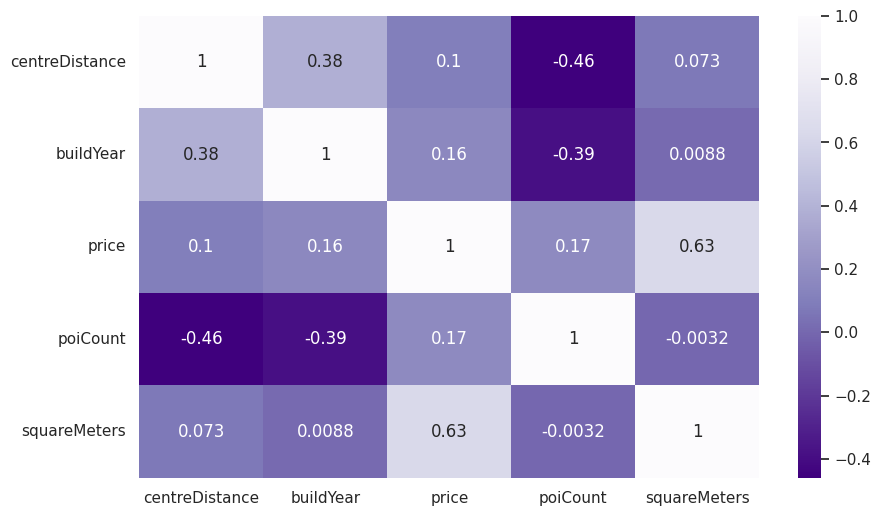

In [ ]:
data = df_p[['centreDistance',  'buildYear',  'price', 'poiCount', 'squareMeters']]
data = data.dropna()

fig = plt.figure()
sns.heatmap(data.corr(), cmap="Purples_r", annot=True)

plt.show()

In [ ]:
%%R
#install.packages("corrplot")
library(corrplot)

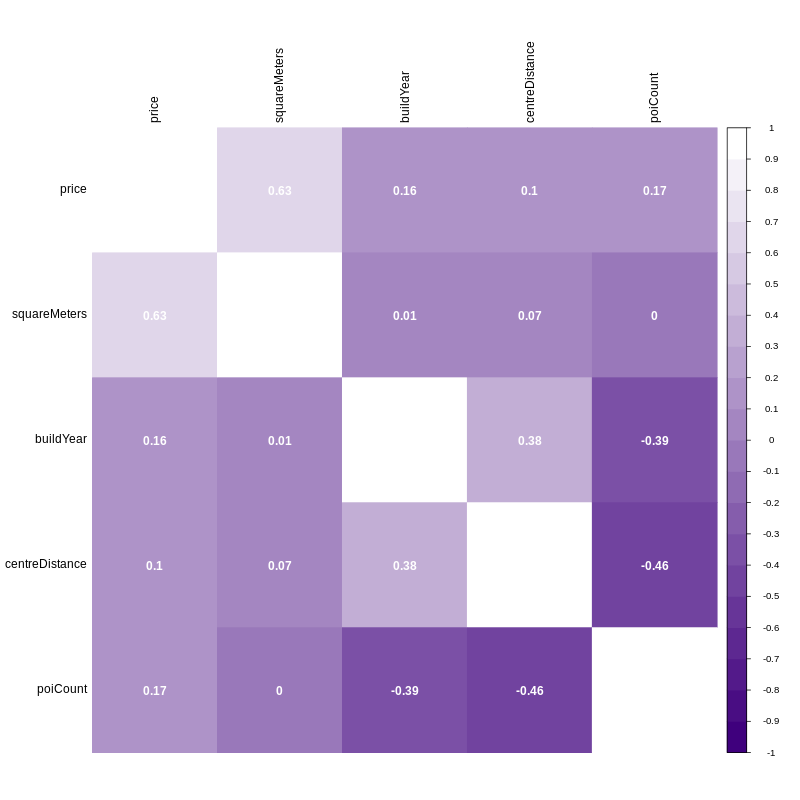

In [ ]:
%%R  -w 800 -h 800
data3 <- df_r[, c(4, 8, 11, 12, 28)]
data3 <- na.omit(data3)
MATRIX <- cor(data3)
col4 <- colorRampPalette(c("#3F007D", "white"))

corrplot(MATRIX, method = "color", col = col4(20), cl.length = 21,
         order = "AOE",  tl.col = "black", addCoef.col = "white")

По таблице можно сказать о следующих корреляциях:
- Положительяная корреляция между ценой и площадью
- Полодительная корреляция между годом постройки и расстоянием до центра города
- Отрицательная корреляция между годом постройки и количеством мест интереса
- Отрицательная корреляция между расстоянием до центра города и количеством мест интереса

##Фактор инфляции дипсперсии

Фактор инфляции дисперсии — мера мультиколлинеарности, существующей в наборе переменных, участвующих в множественных регрессиях.  
Как правило, значение vif выше 5 указывает на высокую корреляцию с другими независимыми переменными.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

data = df_p[['centreDistance',  'buildYear',  'price', 'poiCount', 'squareMeters']]
data = data.dropna()

X = add_constant(data)
ds = pd.Series([variance_inflation_factor(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns)
print(ds)

const             4601.716428
centreDistance       1.384364
buildYear            1.354450
price                1.947999
poiCount             1.553838
squareMeters         1.745987
dtype: float64


Данный метод не указывает на наличие корреляции в данных.

#11. Исследовать зависимости в данных с помощью дисперсионного анализа.

In [ ]:
import scipy.stats as stats
from scipy.stats import f_oneway

tenement = df_p[(df_p.type == 'tenement')]

apartmentBuilding= df_p[(df_p.type == 'apartmentBuilding')]

print(stats.f_oneway(tenement.poiCount, apartmentBuilding.poiCount))
print(stats.f_oneway(tenement.centreDistance, apartmentBuilding.centreDistance))
print(stats.f_oneway(tenement.price, apartmentBuilding.price))

F_onewayResult(statistic=1020.0693685638072, pvalue=1.0174922456001806e-204)
F_onewayResult(statistic=1460.7191070610706, pvalue=3.23548916689655e-282)
F_onewayResult(statistic=314.63930972064855, pvalue=2.0396347343555877e-68)


Тесты показывают, что по данным показателям (количество мест интереса, удалённсоть от центра и цена) жилища типов tenement и apartmentBuilding неэквиваленты

##Однофакторный дисперсионный анализ

In [ ]:
%%R
summary(aov(df_r$poiCount ~ df_r$type))

               Df  Sum Sq Mean Sq F value Pr(>F)    
df_r$type       3 1271116  423705   869.2 <2e-16 ***
Residuals   16993 8283492     487                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Линейная модель (Однофакторный дисперсионный анализ)

In [ ]:
%%R
A1 <- lm(df_r$poiCount ~ df_r$type)
summary(A1)


Call:
lm(formula = df_r$poiCount ~ df_r$type)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.106 -11.940  -4.940   4.894 190.060 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 18.5442     0.3569  51.953  < 2e-16 ***
df_r$typeapartmentBuilding  -2.7057     0.5640  -4.798 1.62e-06 ***
df_r$typeblockOfFlats       -2.6039     0.4347  -5.990 2.14e-09 ***
df_r$typetenement           21.5619     0.5551  38.842  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.08 on 16993 degrees of freedom
Multiple R-squared:  0.133,	Adjusted R-squared:  0.1329 
F-statistic: 869.2 on 3 and 16993 DF,  p-value: < 2.2e-16



##Двухфакторный дисперсионный анализ

In [ ]:
%%R
A2 <- lm(df_r$poiCount ~ df_r$type*df_r$buildYear)
summary(A2)


Call:
lm(formula = df_r$poiCount ~ df_r$type * df_r$buildYear)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.717 -10.392  -4.395   3.927 185.479 

Coefficients:
                                            Estimate Std. Error t value
(Intercept)                                436.78248   25.10980  17.395
df_r$typeapartmentBuilding                 363.16575   94.09003   3.860
df_r$typeblockOfFlats                       20.56886   34.31660   0.599
df_r$typetenement                         -310.47967   48.45396  -6.408
df_r$buildYear                              -0.21070    0.01262 -16.692
df_r$typeapartmentBuilding:df_r$buildYear   -0.17842    0.04675  -3.817
df_r$typeblockOfFlats:df_r$buildYear        -0.01116    0.01725  -0.647
df_r$typetenement:df_r$buildYear             0.16601    0.02493   6.660
                                          Pr(>|t|)    
(Intercept)                                < 2e-16 ***
df_r$typeapartmentBuilding                0.000114 ***
df_r$typeblock

#12. Подогнать регрессионные модели (в том числе, нелинейные) к данным, а также оценить качество подобной аппроксимации.

##Линейная регрессионная модель

**Модель линейной регрессии** устанавливает связь между зависимой переменной ( y ) и по крайней мере одной независимой переменной ( x ) как:

$$ \widetilde{y} = b_1 \cdot x + b_0 $$

В методе OLS мы должны выбрать $b_1$ значения, а также $b_0$ таким образом, чтобы минимизировать общую сумму квадратов разницы между вычисленными и наблюдаемыми значениями y. </br>
**Формула для OLS**:

$$ S = \sum_{i=1}^{n} (y_i - \widetilde{y_i})^2 = \sum_{i=1}^{n} (y_i - b_1 \cdot x - b_0)^2 = \sum_{i=1}^{n} (\widetilde{\xi})^2 = min $$

Где, </br>
$\widetilde{y_i}$ = прогнозируемое значение для i-го наблюдения </br>
$y_i$ = фактическое значение для i-го наблюдения </br>
$\widetilde{\xi}$ = ошибка / невязка для i-го наблюдения </br>
$n$ = общее количество наблюдений </br>

Чтобы получить значения $b_1$, а также  $b_0$, которые минимизируют $S$, мы можем взять частную производную для каждого коэффициента и приравнять ее к нулю

Будет исследовать зависимость цены от площади жилья (price от squareMeters) в Варшаве

In [ ]:
import statsmodels.api as sm

x = df_p[df_p.city == 'warszawa'].squareMeters
y = df_p[df_p.city == 'warszawa'].price

x = sm.add_constant(x)
result = sm.OLS(y, x).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     7025.
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:45:32   Log-Likelihood:                -70248.
No. Observations:                5052   AIC:                         1.405e+05
Df Residuals:                    5050   BIC:                         1.405e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.198e+05   1.05e+04     11.414   

Получили следующую формулу: $$price =  13530 \cdot squareMeters + 119800$$

In [ ]:
%%R
lin <- lm((df_r[(df_r$city == 'warszawa'),])$price ~ (df_r[(df_r$city == 'warszawa'),])$squareMeters)
summary(lin)


Call:
lm(formula = (df_r[(df_r$city == "warszawa"), ])$price ~ (df_r[(df_r$city == 
    "warszawa"), ])$squareMeters)

Residuals:
     Min       1Q   Median       3Q      Max 
-1059818  -162592   -32539   125529  1224807 

Coefficients:
                                                 Estimate Std. Error t value
(Intercept)                                      119757.5    10491.8   11.41
(df_r[(df_r$city == "warszawa"), ])$squareMeters  13533.7      161.5   83.81
                                                 Pr(>|t|)    
(Intercept)                                        <2e-16 ***
(df_r[(df_r$city == "warszawa"), ])$squareMeters   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 264600 on 5050 degrees of freedom
Multiple R-squared:  0.5818,	Adjusted R-squared:  0.5817 
F-statistic:  7025 on 1 and 5050 DF,  p-value: < 2.2e-16



Получили следующую формулу: $$price =  13533.7 \cdot squareMeters - 119757.5$$

Полученные формулы на Python и R практически идентичны

Кроме линейное регрессий возможны также:
- Логистическая регрессия
- Полиномиальная регрессия
- Квантильная регрессия
- Лассо-регрессия / Ридж-регрессия
- Метод главных компонент
- Регрессия наименьших частичных квадратов
- Порядковая регрессия
- Регрессия Пуассона / Отрицательная биноминальная регрессия
- Регрессия Кокса

Рассмотрим полиномиальную регрессию.

##Полиномиальная регрессионная модель

В статистике, полиномиальная регрессия - это форма регрессионного анализа, в которой взаимосвязь между независимая переменная x и зависимая переменная y моделируются как полином  n -й степени от  x . Полиномиальная регрессия соответствует нелинейной зависимости между значением  x  и соответствующим условным средним  y , обозначенным  E(y|x) . Хотя полиномиальная регрессия соответствует нелинейной модели данных, как проблема статистической оценки она является линейной в том смысле, что функция регрессии  E(y|x)  линейна относительно неизвестных параметров, которые оцениваются на основе данных . По этой причине полиномиальная регрессия считается частным случаем множественной линейной регрессии.  
Этот тип регрессии имеет вид:

$$Y = β_0 + β_1 X_1 + β_2 X^2 + … + β_n X^n + ε$$

где n — «степень» многочлена.

In [ ]:
%%R
polynomial = lm((df_r[(df_r$city == 'warszawa'),])$price ~ poly((df_r[(df_r$city == 'warszawa'),])$squareMeters, degree = 4, raw = T))
summary(polynomial)


Call:
lm(formula = (df_r[(df_r$city == "warszawa"), ])$price ~ poly((df_r[(df_r$city == 
    "warszawa"), ])$squareMeters, degree = 4, raw = T))

Residuals:
    Min      1Q  Median      3Q     Max 
-914701 -158959  -30234  130103 1194265 

Coefficients:
                                                                               Estimate
(Intercept)                                                                   3.454e+05
poly((df_r[(df_r$city == "warszawa"), ])$squareMeters, degree = 4, raw = T)1  6.333e+03
poly((df_r[(df_r$city == "warszawa"), ])$squareMeters, degree = 4, raw = T)2 -1.951e+01
poly((df_r[(df_r$city == "warszawa"), ])$squareMeters, degree = 4, raw = T)3  1.830e+00
poly((df_r[(df_r$city == "warszawa"), ])$squareMeters, degree = 4, raw = T)4 -1.064e-02
                                                                             Std. Error
(Intercept)                                                                   1.340e+05
poly((df_r[(df_r$city == "warszawa"), ])$

$$price =  345400 + 6333 \cdot squareMeters - 19.51 \cdot squareMeters^2 + 1.830 \cdot squareMeters^3 - 0.01064 \cdot squareMeters^4$$

По данным сайта https://koronapay.com/transfers/europe/blog/kvartiry-v-polshe-skolko-stoit-kupit-ili-snyat/
цена одного квадратного метра жилья в Варшаве стоит 12895 злотых, что согласуется с полученными формулами и имеющимися данными. Полиномиальная модель улучшила апроксимацию